# Contiene Código Para elaboración Figuras Artículo salgar.

In [2]:
%matplotlib inline
import pylab as pl 
import numpy as np 
from wmf import wmf
import pandas as pd
import scipy as sc

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
Paleta = {'c1':'#fde725',
    'c2':'#b5de2b',
    'c3':'#6ece58',
    'c4':'#35b779',
    'c5':'#1f9e89',
    'c6':'#26828e',
    'c7':'#2f658a',
    'c8':'#3e4989',
    'c9':'#482878'}

In [4]:
cu = wmf.SimuBasin(rute='/media/nicolas/Home/nicolas/03_SALGAR/nc_cuencas/cuencaSalgar_4_12mts.nc')

/usr/local/lib/python2.7/dist-packages/rasterio/features.py:102: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [4]:
kshClass = np.zeros(cu.ncells)
for c,i in enumerate([20,50,100,120,150]):
    kshClass[wmf.models.h_coef[1]>i] = c+1

In [5]:
12.7**2/1000./1000.

0.00016129

In [4]:
cu.Save_Basin2Map('/home/nicolas/Dropbox/Articulos_Prep/Salgar/mapas/SalgarDivisoria.shp')

In [8]:
cu.Save_Net2Map('/home/nicolas/Dropbox/Articulos_Prep/Salgar/mapas/Red_Medellin.shp', umbral=100)

In [123]:
cu.GetGeo_Ppal_Hipsometric()

/usr/local/lib/python2.7/dist-packages/wmf/wmf.py:764: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  Y = pd.rolling_mean(Y,window)


In [4]:
cu.GetGeo_Cell_Basics()
cu.GetGeo_Parameters()

In [135]:
10.763-2.148-1.156

7.4590000000000005

In [5]:
cu.GetGeo_HAND()

In [6]:
cu.CellHAND[cu.CellHAND<0] = 0

In [7]:
cu.GetGeo_StreamOrder()

In [8]:
Slopes = []
Order = []
for i in range(cu.nhills):
    pos = np.where((cu.CellCauce == 1) & (cu.hills_own == i+1))[0]
    try:
        Order.append(cu.CellHorton_Stream[pos[0]])
        Slopes.append(cu.CellSlope[pos].mean())
    except:
        pass
Order = np.array(Order)
Slopes = np.array(Slopes)

In [14]:
for i in range(1,6):
    #$print Slopes[Order == i].mean()
    print np.percentile(Slopes[Order == i], 99)

0.783474166393
0.616449033022
0.27676007241
0.181665708274
0.11051926136


(array([ 73.,  79.,  67.,  54.,  56.,  24.,  13.,   4.,   2.,   1.]),
 array([ 0.001     ,  0.09606837,  0.19113674,  0.28620511,  0.38127348,
         0.47634185,  0.57141022,  0.66647859,  0.76154696,  0.85661533,
         0.9516837 ]),
 <a list of 10 Patch objects>)

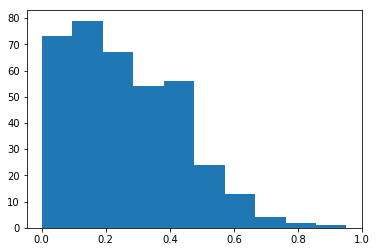

In [15]:
pl.hist(Slopes[np.isfinite(Slopes)])

## Figura 3: Perfil Longitudinal y Curva Hipsometrica

In [11]:
cu.GetGeo_Ppal_Hipsometric()

/usr/local/lib/python2.7/dist-packages/wmf/wmf.py:764: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  Y = pd.rolling_mean(Y,window)


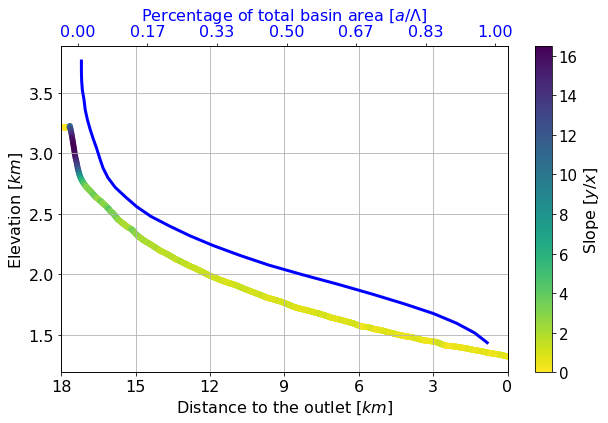

In [12]:
fig =pl.figure(figsize=(10,6))
#Parte 1: Figura del perfil longitudinal
ax = fig.add_subplot(111)
pl.scatter(cu.ppal_stream[1]/1000.0,
    cu.ppal_stream[0]/1000.0, 
    c = cu.ppal_slope, 
    lw = 0,
    cmap = pl.get_cmap('viridis_r'))
cmap = pl.colorbar()
cmap.set_label('Slope [$y/x$]', size = 16)
cmap.ax.tick_params(labelsize = 15)
ax.grid()
ax.tick_params(labelsize = 16)
ax.set_xlim(0, cu.ppal_stream[1].max()/1000.0)
ax.set_xlabel('Distance to the outlet [$km$]', size = 16)
ax.set_ylabel('Elevation [$km$]', size = 16)
X  = cu.ppal_stream[1]/1000.0
ax.set_xticks(np.linspace(0, X.max(), 7))
Xt = ['%d' % i for i in np.linspace(0,X.max(),7)]
ax.set_xticklabels(Xt[::-1])
# PArte 2: Figura de la curva hipsometrica 
ax2 = ax.twiny()
Area = (cu.hipso_basin[0]*12.7**2.0/1e6)/56.86
ax2.plot(Area, cu.hipso_basin[1]/1000.0, 'b', lw = 3)
for tl in ax2.get_xticklabels():
    tl.set_color('b')
ax2.grid(False)
ax2.tick_params(labelsize = 16)
ax2.set_xlabel('Percentage of total basin area [$a/\\Lambda$]', 
    size = 16,
    color = 'b')
a = ax2.set_xticks(np.linspace(0, 1, 7))
At = ['%.2f' % i for i in np.linspace(0,1,7)]
a = ax2.set_xticklabels(At)
# Guarda la Figura 
#pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Perfil_Cauce.png', bbox_inches = 'tight')

In [12]:
wmf.cu.dx = 0.000114

In [13]:
wmf.cu.dy

array(0.00011298252502456307, dtype=float32)

http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-76.0945856392,5.92474578417,-75.9783056369,6.01727847217&bboxSR=4326&imageSR=4326&size=1500,1193&dpi=96&format=png32&f=image


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


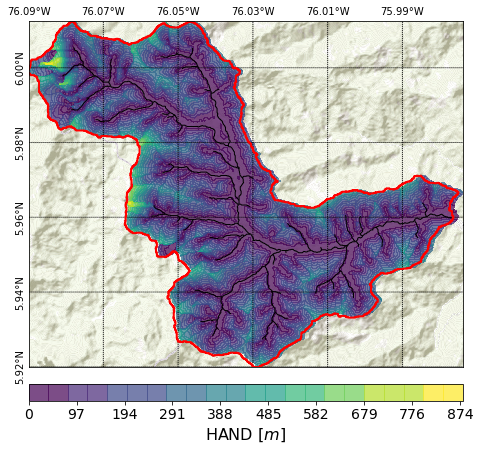

(<mpl_toolkits.basemap.Basemap at 0x7f89880f8610>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8989c9cf50>)

In [17]:
Texto = ['%d' % i for i in np.linspace(cu.CellHAND.min(), cu.CellHAND.max(),10)]
cu.Plot_basin(cu.CellHAND,alpha = 0.7,lines_spaces=0.02,
    colorTable=pl.get_cmap('viridis',10),backMap = True, 
    colorbarLabel = 'HAND [$m$]',
    ruta = '/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/HAND_Ubicacion.png',
    cbar_ticks = np.linspace(cu.CellHAND.min(), cu.CellHAND.max(),10),
    cbar_ticklabels = Texto, 
    cbar_ticksize = 14,
    rutaShp='/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'k',shpWidth = 1.0)

## Simulación 

### Set de la velocidad no lineal en la superficie

In [5]:
cu.GetGeo_Cell_Basics()

/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


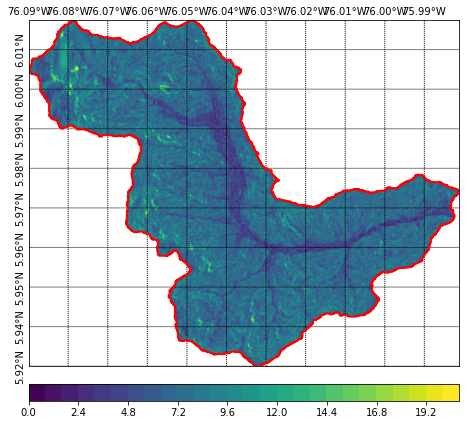

(<mpl_toolkits.basemap.Basemap at 0x7fd1f130d5d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd25ce58f90>)

In [6]:
CoefRunoff = 0.44 * cu.CellSlope**(0.5) / 0.05
cu.Plot_basin(CoefRunoff)

In [7]:
cu.set_PhysicVariables('h_coef', CoefRunoff, 0)
cu.set_PhysicVariables('h_exp', 0.64, 0)
cu.set_Speed_type([2,2,1])

Coloca correccion en los parametros de la onda cinematica 

In [8]:
area = cu.CellAcum * (12.7**2)/1e6 #Tamaño de celda al cuadrado
var,w1 = wmf.OCG_param(pend = cu.CellSlope, area = area)
cu.set_PhysicVariables('h_coef',var,3)
#Variable del exponente horizontal 
cu.set_PhysicVariables('h_exp',w1,3)

In [9]:
cu.set_Geomorphology(stream_width=12.7)

In [31]:
cu.Save_SimuBasin('/media/nicolas/Home/nicolas/03_SALGAR/nc_cuencas/cuencaSalgar_4_12mts.nc',
    '/media/nicolas/Home/nicolas/03_SALGAR/raster/dem_salgar.tif',
    '/media/nicolas/Home/nicolas/03_SALGAR/raster/dir_salgar.tif')

## Validacion del model 

In [10]:
#Watershed paths
cu = wmf.SimuBasin(rute='/media/nicolas/Home/nicolas/03_SALGAR/nc_cuencas/cuencaSalgar_4_12mts.nc')
Calibracion = [0.01, 2.7, 0.8, 0.0, 0.1, 1.0, 0.5, 0.996, 1.0, 1.0]
Calibracion = [0.1,2.7, 0.8, 0.0, 0.1, 0.5, 0.5, 0.996, 1.0, 1.0]

In [11]:
#Rutas de lluvia 
rutaBin = '/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/RadarV2_2015.bin'
rutaHdr = '/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/RadarV2_2015.hdr'
#Estructura temporal de la lluvia 
RainStruct = wmf.read_rain_struct(rutaHdr)
RainRec = RainStruct[' Record']
RainVal = RainStruct[' Lluvia']

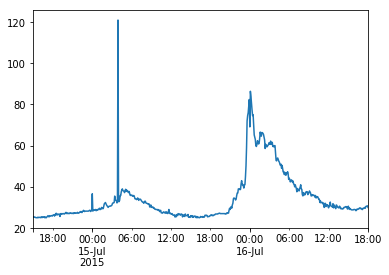

In [112]:
Qobs['2015-07-14 15:00':'2015-07-16 18:00'].plot()

In [123]:
#Runin period 
Inicio = RainRec.index.get_loc('2015-07-14 15:00')
Fin = RainRec.index.get_loc('2015-07-16 18:00')
Npasos = Fin - Inicio

In [ ]:
Res3,Qsim3,Qsep = cu.run_shia(Calibracion,
    rutaBin,
    Npasos,Inicio,)

In [119]:
Qb = Qobs['2015-07-14 15:00':'2015-07-16 18:00'].copy()
Qb = Qb-np.percentile(Qb, 20) + np.percentile(Qsim3['1'], 20)

In [146]:
Qobs.index[0]

Timestamp('2015-05-23 00:00:00', freq='5T')

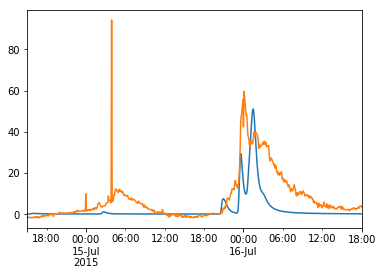

In [131]:
Qsim3['1'].plot()
Qb.plot()

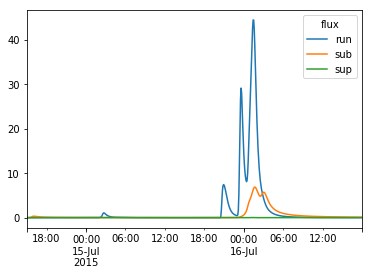

In [132]:
Qsep['1'].plot()

In [ ]:
RainFileds

### Modelacion con condiciones no linelaes 

In [72]:
cu = wmf.SimuBasin(rute='/media/nicolas/Home/nicolas/03_SALGAR/nc_cuencas/cuencaSalgar_4_12mts.nc')

In [12]:
#Rutas de lluvia 
rutaBin = '/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/Ensayo_12m.bin'
rutaHdr = '/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/Ensayo_12m.hdr'
# Lluvia clasificada 
rutaConvBin = '/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/Ensayo_12m_conv.bin'
rutaConvHdr = '/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/Ensayo_12m_conv.hdr'
rutaStraBin = '/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/Ensayo_12m_stra.bin'
rutaStraHdr = '/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/Ensayo_12m_stra.hdr'
#Estructura temporal de la lluvia 
RainStruct = wmf.read_rain_struct(rutaHdr)
RainRec = RainStruct[' Record']
RainVal = RainStruct[' Lluvia']

In [13]:
R = wmf.read_rain_struct(rutaHdr)

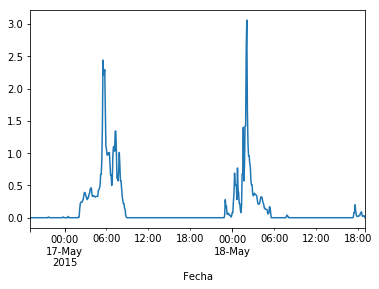

In [14]:
R[' Lluvia'].plot()

In [15]:
#Punto de inicio y punto fin 
Inicio = RainRec.index.get_loc('2015-05-17-19:00')
Fin = RainRec.index.get_loc('2015-05-18-12:00')

In [20]:
RainFileds = {}
#Punto de inicio y punto fin 
Inicio = RainRec.index.get_loc('2015-05-17-00:00')
Fin = RainRec.index.get_loc('2015-05-17-12:00')
Vsum = np.zeros(cu.ncells)
for i in RainRec[Inicio:Fin]:
    v1,r = wmf.models.read_int_basin(rutaConvBin, i, cu.ncells)
    v1 = v1.astype(float)/1000.
    v2,r = wmf.models.read_int_basin(rutaBin, i, cu.ncells)
    Vsum += (v2.astype(float)/1000.)*v1
RainFileds.update({'E1':Vsum})
#Punto de inicio y punto fin 
Inicio = RainRec.index.get_loc('2015-05-17-19:00')
Fin = RainRec.index.get_loc('2015-05-18-12:00')
Vsum = np.zeros(cu.ncells)
for i in RainRec[Inicio:Fin]:
    v1,r = wmf.models.read_int_basin(rutaConvBin, i, cu.ncells)
    v1 = v1.astype(float)/1000.
    v2,r = wmf.models.read_int_basin(rutaBin, i, cu.ncells)
    Vsum += (v2.astype(float)/1000.)*v1
RainFileds.update({'E2':Vsum})

In [ ]:
fig = pl.figure(figsize=(10,5))
b = np.linspace(0,120,7)
tt = ['%d'%i for i in b]
ax = fig.add_subplot(121)
RainFileds['E1'][0] = 125
cu.Plot_basin(RainFileds['E1'], backMap=False, colorTable=pl.get_cmap('viridis',10),axis=ax,fig = fig,
    lines_spaces=0.03,ZeroAsNaN='si',ticksize = 14,
    colorbarLabel='Sum of convective rain [mm]', vmin = 0, vmax = 120,
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'r', per_color = 'k', shpWidth = 1.5,
    cbar_ticks = b,
    cbar_ticklabels = tt,
    cbar_ticksize = 16)
ax = fig.add_subplot(122)
cu.Plot_basin(RainFileds['E2'], backMap=False, colorTable=pl.get_cmap('viridis',10),axis=ax,fig=fig,
    lines_spaces=0.03,ZeroAsNaN='si',
    colorbarLabel='Sum of convective rain [mm]', vmin = 0, vmax = 120,
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'r', per_color = 'k', shpWidth = 1.5,
    cbar_ticks = b,
    cbar_ticklabels = tt,
    cbar_ticksize = 16)

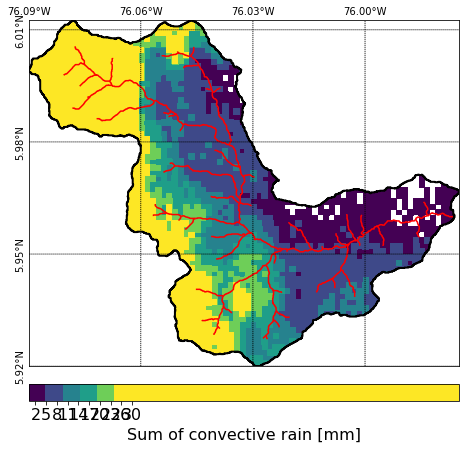

(<mpl_toolkits.basemap.Basemap at 0x7f80c93d0790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f80c9413850>)

In [40]:
b = np.linspace(2,30,10)
tt = ['%d'%i for i in b]
cu.Plot_basin(Vsum, backMap=False, colorTable=pl.get_cmap('viridis',10),lines_spaces=0.03,ZeroAsNaN='si',
    colorbarLabel='Sum of convective rain [mm]', vmin = 0, vmax = 30,
    #ruta = '/home/nicolas/Dropbox/Temporal/Salgar_Convq.png',
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'r', per_color = 'k', shpWidth = 1.5,
    cbar_ticks = b,
    cbar_ticklabels = tt,
    cbar_ticksize = 16)

In [21]:
#set del modelo 
wmf.models.separate_fluxes = 1
wmf.models.separate_rain = 1
wmf.models.show_speed = 1
wmf.models.show_area = 1
wmf.models.show_speed = 1
wmf.models.show_storage = 1 
wmf.models.save_retorno = 1
wmf.models.save_storage = 1
wmf.models.retorno=1
#Rutas de guardado 
SaveStorage = '/media/nicolas/Home/nicolas/03_SALGAR/bin_sto/Salgar_Storage.bin'
SaveReturn = '/media/nicolas/Home/nicolas/03_SALGAR/bin_sto/Salgar_Return.bin'
#Calibracion 
Calibracion = [0.01, 2.7, 0.8, 0.0, 0.1, 1.0, 0.5, 0.996, 1.0, 1.0]

In [17]:
#Punto de inicio y punto fin 
#Inicio = RainRec.index.get_loc('2015-05-17-2:00')
#Fin = RainRec.index.get_loc('2015-05-17-20:20')
#Fin = RainRec.index.get_loc('2015-05-18-5:30')

Inicio = RainRec.index.get_loc('2015-05-17-20:20')
Fin = RainRec.index.get_loc('2015-05-18-5:30')


Npasos = Fin - Inicio

In [139]:
for c,s in enumerate(Res3['Storage']):
    cu.set_Storage(s,c)

In [121]:
cu.set_Storage(Res['Storage'][0]*0.0,0)

In [20]:
#cu.set_Storage(1500, 3)
Calibracion = [0.01, 2.7, 0.8, 0.0, 0.1, 1.0, 0.5, 0.996, 1.0, 1.0]
#Ejecucion del modelo
#3,Qsim3,Qsep
Res = cu.run_shia(Calibracion,
    rutaBin,
    Npasos,Inicio,ruta_stra = rutaStraBin, ruta_conv = rutaConvBin)
    #ruta_storage = SaveStorage,
    #ruta_retorno = SaveReturn,
    #ruta_conv = rutaConvBin,
    #ruta_stra = rutaStraBin)

KeyError: 'Rain_Sep'

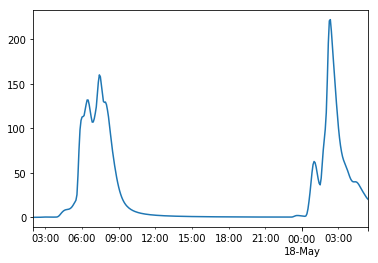

In [130]:
Qsim3['1'].plot()

In [ ]:
fig = pl.figure(figsize=(7,5))
ax = fig.add_subplot(111)
Qsim['99'].plot.line(lw = 3, label = 'Original')
Qsim2['99'].plot.line(lw = 3, label = '0.7$H_u$')
Qsim3['99'].plot.line(lw = 3, label = '0.3$H_u$')
ax.tick_params(labelsize = 16)
ax.set_xlabel('Time [$5min$]', size = 17)
ax.set_ylabel('Streamflow [$m^3.s^{-1}$]', size = 17)
pl.legend(loc = 0)
pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/VariandoHuEvento2.png',
    bbox_inches = 'tight')

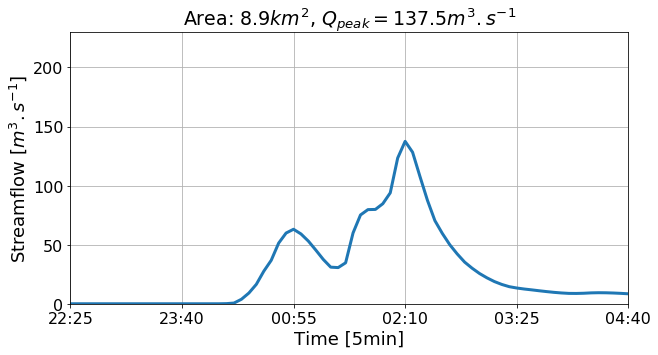

In [93]:
ids = '303'
Q = Qsim[ids].values
D = Qsim[ids].index.to_pydatetime()
td = [i.strftime('%H:%M') for i in D[25::15]]
A = '%.1f' % Area[cu.hills_own == float(ids)].max()
Qmax = '%.1f' % np.max(Q)
Titulo = 'Area: '+A+'$km^2$, $Q_{peak} = '+Qmax+'m^3.s^{-1}$'

fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(D[25:], Q[25:], lw = 3)
ax.tick_params(labelsize = 16)
ax.grid(True)
ax.set_xticks(D[25::15])
ax.set_xticklabels(td)
ax.set_xlim(D[25::15][0], D[25::15][-1])
ax.set_ylim(0,230)
ax.set_title(Titulo, size = 19)
ax.set_xlabel('Time [5min]', size = 18)
ax.set_ylabel('Streamflow [$m^3.s^{-1}$]', size = 18)
pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Evento_303.png',
    bbox_inches = 'tight')

In [31]:
Qrun = Res['Fluxes'][-1][0]
Qsub = Res['Fluxes'][-1][1]
#Qconv = Res['Rain_sep'][-1][0]
#Qstra = Res['Rain_sep'][-1][1]

In [199]:
Qvarios = []
QR = []
QS = []
for vr in [0.1, 0.5, 1., 2., 3, 6,]:#np.linspace(0.01, 20.2, 8):
    #Calibration
    C =  [0.01, 2.7, 0.8, 0.0, vr, 1.0, 0.5, 0.996, 1.0, 1.0]
    #Run
    Res,Qsim,Qsep = cu.run_shia(C,
        rutaBin,
        Npasos,Inicio,)
    #Toma resultado 
    Qvarios.append(Qsim['1'][15:])
    QR.append(Res['Fluxes'][-1][0])
    QS.append(Res['Fluxes'][-1][1])
    print(vr)

0.1
0.5
1.0
2.0
3
6


In [201]:
Qvarios = []
QR = []
QS = []
for ks in np.linspace(0.01, 20.2, 6):
    #Calibration
    C =  [0.01, ks, 0.8, 0.0, 0.1, 1.0, 0.5, 0.996, 1.0, 1.0]
    #Run
    Res,Qsim,Qsep = cu.run_shia(C,
        rutaBin,
        Npasos,Inicio,)
    #Toma resultado 
    Qvarios.append(Qsim['1'][15:])
    QR.append(Res['Fluxes'][-1][0])
    QS.append(Res['Fluxes'][-1][1])
    print(ks)

0.01
4.047999999999999
8.085999999999999
12.123999999999997
16.162
20.2


In [191]:
Qvarios = []
QR = []
QS = []
for Vsub in np.linspace(0.1, 10, 6):
    #Calibration
    C =  [0.01, 2.7, 0.8, 0.0, 0.1, Vsub, 0.5, 0.996, 1.0, 1.0]
    #Run
    Res,Qsim,Qsep = cu.run_shia(C,
        rutaBin,
        Npasos,Inicio,)
    #Toma resultado 
    Qvarios.append(Qsim['1'][15:])
    QR.append(Res['Fluxes'][-1][0])
    QS.append(Res['Fluxes'][-1][1])
    print(ks)

20.2
20.2
20.2
20.2
20.2
20.2


In [124]:
wmf.models.h_coef.mean(axis = 1)

array([  6.43070793e+00,   7.08874283e+01,   9.19870654e-05,
         9.35575485e-01], dtype=float32)

In [31]:
for i in Qvarios:
    print(i.max())

153.742
221.766
257.973
264.318
267.117
270.307
271.582
272.334
272.861
273.495


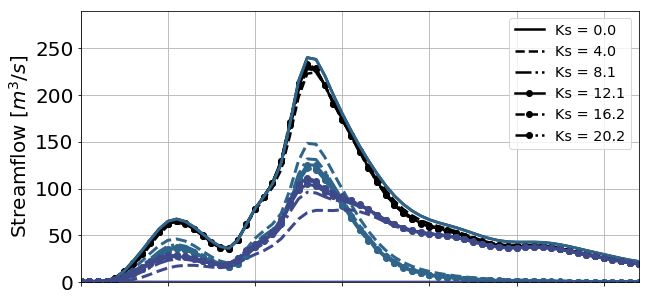

In [202]:
key = 'Ks'
DicVal = {'Vr': [0.1, 0.5, 1., 2., 3, 6],
         'Ks': np.linspace(0.01, 20.2, 6),
         'Vs': np.linspace(0.1, 10, 6)}

Styles = ['-', '--', '-.', '-', '--', '-.']
Marker = [' ',' ',' ','o','o','o']

paso = 10
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for s,q,d,m in zip(Styles,Qvarios, DicVal[key], Marker):
    ax.plot(Qvarios[0].index, q.values, 'k',lw = 2.5 ,ls = s, label = 'Ks = %.1f' % d, marker = m)
for s,q,m in zip(Styles, QR, Marker):
    ax.plot(Qvarios[0].index,q[15:], Paleta['c7'], lw = 3, ls = s, marker = m)
for s,q,m in zip(Styles,QS, Marker):
    ax.plot(Qvarios[0].index,q[15:], Paleta['c8'], lw = 3, ls = s, marker = m)
ax.tick_params(labelsize = 20)
ax.grid(True)
#ax.set_xlabel('Time [$5min$]', size = 20)
ax.set_ylabel('Streamflow [$m^3/s$]', size = 20)
ax.set_xticks(Qvarios[0].index[::paso])
ax.set_xticklabels('')
#ax.set_xticklabels([d.strftime('%H:%M') for d in Qvarios[0].index[::paso].to_pydatetime()])
ax.set_xlim(Qvarios[0].index[30], Qvarios[0].index[-1])
ax.set_ylim(0,290)
ax.legend(loc = 0, fontsize = 'x-large')
pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Salgar_Ks_variations.png', bbox_inches = 'tight')

In [74]:
QvariosS = []
QRS = []
QSS = []
for vr in np.linspace(0.1, 10, 8):
    #Calibration
    C =  [0.01, 2.7, 0.8, 0.0, 0.1, vr, 0.5, 0.996, 1.0, 1.0]
    #Run
    Res,Qsim,Qsep = cu.run_shia(C,
        rutaBin,
        Npasos,Inicio,)
    #Toma resultado 
    QvariosS.append(Qsim['1'][15:])
    QRS.append(Res['Fluxes'][-1][0])
    QSS.append(Res['Fluxes'][-1][1])
    print(ks)

20.2
20.2
20.2
20.2
20.2
20.2
20.2
20.2


NameError: name 'QRS' is not defined

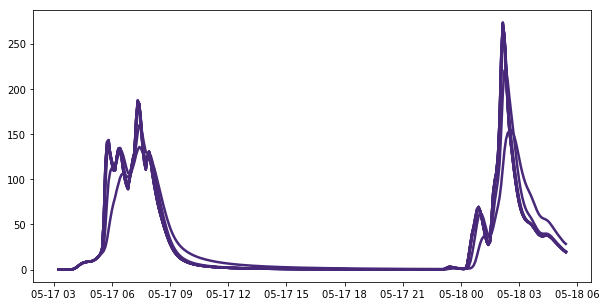

In [136]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for q in Qvarios:
    ax.plot(Qvarios[0].index,q.values, Paleta['c9'],lw = 2.5 )
for q in QRS:
    ax.plot(Qvarios[0].index[15:], q[15:], Paleta['c7'], lw = 3)
for q in QSS:
    ax.plot(Qvarios[0].index[15:], q[15:], Paleta['c8'], lw = 3, ls = '--')
ax.tick_params(labelsize = 16)
ax.grid(True)
ax.set_xlabel('Time [$5min$]', size = 18)
ax.set_ylabel('Streamflow [$m^3/s$]', size = 18)
ax.legend(loc = 0)
pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Salgar_vsub_variations.png', bbox_inches = 'tight')

In [135]:
Qvarios

NameError: name 'QvariosS' is not defined

### Figura simulación y condiciones medias en 3 tanques principales 

In [1]:
fig = pl.figure(figsize=(14,8))

Texto = [i.strftime('%d/%H:%M') for i in RainVal[Inicio:Fin].index.to_pydatetime()]

ax1 = fig.add_subplot(311)
ax1.plot(Res['Qsim'][-3], '#472F7A',lw = 3, label = 'Qsim')
#ax1.plot(Qconv, '#CDF22B',lw = 3, label = 'Convective')
#ax1.plot(Qstra, '#6DF28A',lw = 3,ls = '--', label = 'Stratiform')
ax1.plot(Qrun, '#3A5093',lw = 3, label = 'Runoff')
ax1.plot(Qsub, '#3A5093',lw = 3,ls = '--', label = 'Sub superficial')
ax1.set_title('a) Simulated streamflow, fluxes and rain separation', size = 16)
ax2 = ax1.twinx()
ax2.set_ylim(0,3.1)
ax2.set_ylim(ax2.get_ylim()[::-1])
#ax2.fill_between(range(len(Qconv)), RainVal.values[Inicio:Fin], color = 'b', alpha = 0.2)
ax1.set_xlim(20,330)
a = ax1.set_xticks(np.arange(10, 332, 30))
ax1.set_yticks([0,100,200])
ax1.set_yticklabels([0,100,200], rotation = 'vertical')
ax1.set_xticklabels([])
ax1.tick_params(labelsize = 13)
ax2.tick_params(labelsize = 14)
ax1.set_ylabel('$Q_{sim}$ $[m^3/s]$', size = 15)
ax2.set_ylabel('Rainfall $[mm]$', size = 15)
ax2.yaxis.label.set_color('b')
ax1.grid(True)
ax1.legend(loc=0, fontsize = 'large')
ax2.tick_params(axis='y', colors='blue')

ax3 = fig.add_subplot(312)
ax3.plot(Res['Mean_Storage'][1], '#3A5093', lw = 3, label = 'Runoff')
ax3.plot(Res['Mean_Storage'][2], '#3A5093', lw = 3, ls = '--',label = 'Gravitational')
ax4 = ax3.twinx()
ax4.plot(Res['Mean_Storage'][0], '#472F7A', lw = 3, label = 'Capilar')
ax3.set_title('b) Simulated mean basin soil moisture and runoff', size = 16)
ax3.set_xlim(20,330)
ax4.set_xlim(20,330)
a = ax3.set_xticks(np.arange(10, 332, 30))
a = ax3.set_xticklabels([Texto[i] for i in range(10,332,30)])
ax3.grid(True)
ax3.tick_params(labelsize = 14, color = '#3A5093')
ax4.tick_params(labelsize = 13, color = '#472F7A')
ax3.set_ylabel('Storage $[mm]$', size = 15, color = '#3A5093')
ax4.set_ylabel('Storage $[mm]$', size = 15, color = '#472F7A')
ax3.legend(loc = 3, fontsize = 'large')
ax4.legend(loc = 2, fontsize = 'large')
ax3.yaxis.label.set_color('#3A5093')
ax3.spines['left'].set_color('#3A5093')
ax3.tick_params(axis='y', colors='#3A5093')
ax4.tick_params(axis='y', colors='#472F7A')
ax4.set_yticks([10,20,30,40])
ax4.set_yticklabels([10,20,30,40], rotation = 'vertical')
#pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Caudal_Sim.png', bbox_inches = 'tight')

NameError: name 'pl' is not defined

### Figura de la evolución de la humedad en los tanques de forma distrribuida 

In [44]:
Grup = np.zeros(cu.ncells)
for c,i in enumerate(np.linspace(1,cu.ncells+1, 50)):
    Grup[cu.structure[0]>i] = c+1

Figura de los grupos seleccionados para el analisis distribuido espacialemente 

http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-76.0948989531,5.92463182009,-75.9796567775,6.01716450808&bboxSR=4326&imageSR=4326&size=1500,1204&dpi=96&format=png32&f=image


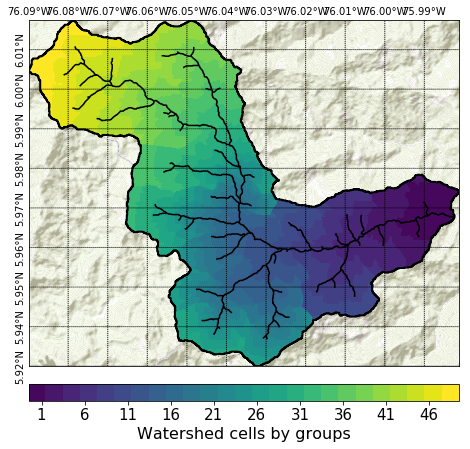

(<mpl_toolkits.basemap.Basemap at 0x7f80c91ec790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f80b3644cd0>)

In [45]:
cu.Plot_basin(Grup, backMap=True, colorTable=pl.get_cmap('viridis',50),
    colorbarLabel='Watershed cells by groups',
    ruta = '/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Mapa_Grupos50.png',
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'k', per_color = 'k', shpWidth = 1.5,
    cbar_ticks = np.arange(1,50,5)+0.5,
    cbar_ticklabels = np.arange(1,50,5),
    #cbar_ticks = np.arange(0,11,1),
    #cbar_ticklabels = np.arange(0,11,1),
    cbar_ticksize = 15)

Calcula almacenamientos medios maximos capilares y gravitacionales para los grupos de análisis, esto con la finalidad de poder presentar la humedad en cada uno de los grupos.

In [54]:
Max_t0 = []
Max_t2 = []
for i in range(50):
    Max_t0.append(wmf.models.max_capilar[0][Grup == i].mean())
    Max_t2.append(wmf.models.max_gravita[0][Grup == i].mean())
Max_t0 = np.array(Max_t0)
Max_t2 = np.array(Max_t2)

In [ ]:
3500-900-450-1000

In [55]:
rutSto = '/media/nicolas/Home/nicolas/03_SALGAR/bin_sto/Salgar_Storage.bin.StObin'
rutRet = '/media/nicolas/Home/nicolas/03_SALGAR/bin_sto/Salgar_Return.bin'

Mat_t0 = []
Mat_t1 = []
Mat_t2 = []
Mat_r = []
for j in range(1,330):
    v1,r = wmf.models.read_float_basin_ncol(rutSto, j, cu.ncells, 5)
    v2,r = wmf.models.read_float_basin_ncol(rutRet, j, cu.ncells, 1)
    Var1 = []
    Var2 = []
    Var3 = []
    Ret = []
    for i in range(50):
        Var1.append(v1[0][Grup == i].mean())
        Var2.append(v1[2][Grup == i].mean())
        Var3.append(v1[1][Grup == i].mean())
        Ret.append(v2[0][Grup == i].mean())
    Mat_t0.append(Var1)
    Mat_t2.append(Var2)
    Mat_t1.append(Var3)
    Mat_r.append(Ret)
Mat_t0 = np.array(Mat_t0)
Mat_t2 = np.array(Mat_t2)
Mat_t1 = np.array(Mat_t1)
Mat_r = np.array(Mat_r)

Figura de la evolución espacio temporal 

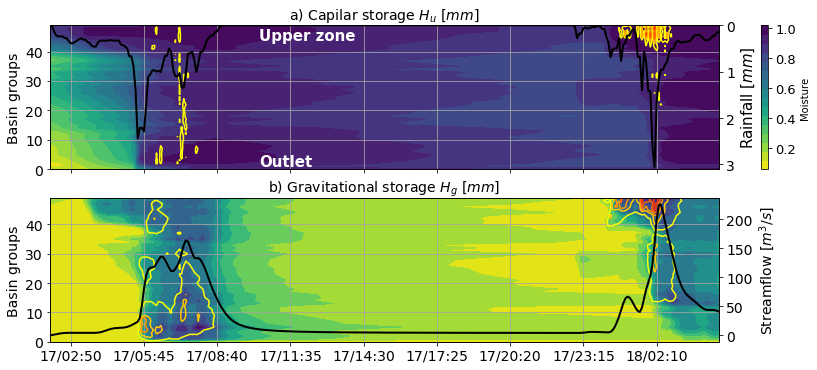

In [273]:
#Ejes de la figura
x = np.arange(Mat_r.shape[0])
y = np.arange(Mat_r.shape[1])
X,Y = np.meshgrid(x,y)

#Figura
fig = pl.figure(figsize=(15,9))

#Primer plot
ax = fig.add_subplot(311)
a = Mat_t0 / Max_t0
m1 = pl.contourf(X,Y, a.T, 15, cmap = pl.get_cmap('viridis_r'))
cbar = pl.colorbar(m1, label = 'Moisture')
cbar.ax.tick_params(labelsize = 13)
cbar.set_ticks(np.arange(0,1.2,0.2))
pl.contour(X,Y,Mat_r.T,np.arange(0.1,0.4,0.1), alpha = 1.0, cmap = pl.get_cmap('autumn_r'))
ax.set_xticklabels([])
ax.tick_params(labelsize = 14)
a = ax.set_xticks(np.arange(10, 301, 35))
ax.grid(color = '#A4A4A4')
ax.set_title('a) Capilar storage $H_u$ [$mm$]', size = 14)
ax.set_ylabel('Basin groups', size =14)
ax.text(100,1, 'Outlet', size = 15, color = 'w', weight = 'bold')
ax.text(100,44, 'Upper zone', size = 15, color = 'w', weight = 'bold')
ax2 = ax.twinx()
ax2.set_ylim(0,3.1)
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.plot(RainVal.values[Inicio:Fin], 'k', lw = 2, label = 'Rain')
ax2.set_ylabel('Rainfall $[mm]$', size = 15, color = 'k')
ax2.set_xlim(0,320)
ax2.tick_params(labelsize = 14)

#Segundo plot
ax = fig.add_subplot(312)
a = Mat_t2 
m1 = pl.contourf(X,Y, a.T, 10, cmap = pl.get_cmap('viridis_r'))
m2 = pl.contour(X,Y,Mat_t1.T,np.linspace(1,12,6), alpha = 1.0, cmap = pl.get_cmap('autumn_r'))
cbar = pl.colorbar(m1)
cbar.remove()
ax.tick_params(labelsize = 14)
a = ax.set_xticks(np.arange(10, 301, 35))
ax.grid(color = '#A4A4A4')
ax.set_title('b) Gravitational storage $H_g$ [$mm$]', size = 14)
ax.set_ylabel('Basin groups', size =14)
ax2 = ax.twinx()
ax2.plot(Qsim['1'].values, 'k', lw = 2)
ax2.set_xlim(0,320)
ax2.tick_params(labelsize = 14)
ax2.set_ylabel('Streamflow [$m^3/s$]', size = 14)
a = ax.set_xticks(np.arange(10, 301, 35))
a = ax.set_xticklabels([Texto[i] for i in range(10,300,35)])

#pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Evolucion_humedad.png', bbox_inches = 'tight')

In [57]:
Qsim=Res['Qsim'][-3]

NameError: name 'Res' is not defined

In [59]:
#Ejes de la figura
x = np.arange(Mat_r.shape[0])
y = np.arange(Mat_r.shape[1])
X,Y = np.meshgrid(x,y)

In [63]:
a

In [68]:
a1.shape

(329, 50)

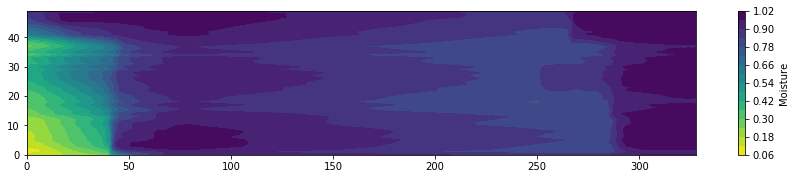

In [69]:
#Figura
fig = pl.figure(figsize=(15,9))

#Primer plot
ax = fig.add_subplot(311)
a1 = Mat_t0 / Max_t0
m1 = pl.contourf(X,Y, a1.T, 15, cmap = pl.get_cmap('viridis_r'))
cbar = pl.colorbar(m1, label = 'Moisture')

IndexError: list index out of range

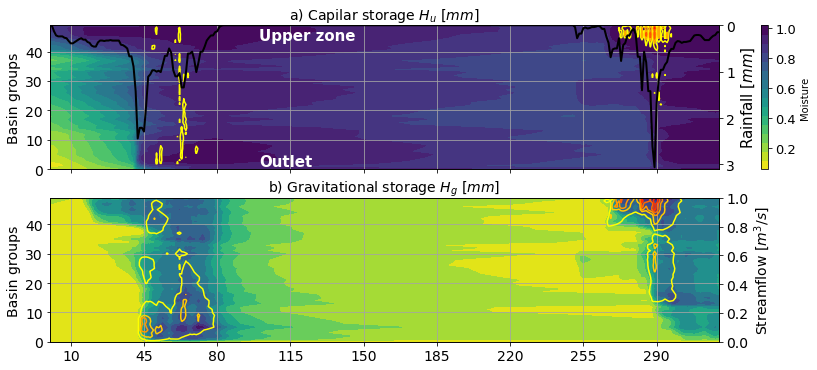

In [64]:
cbar.ax.tick_params(labelsize = 13)
cbar.set_ticks(np.arange(0,1.2,0.2))
pl.contour(X,Y,Mat_r.T,np.arange(0.1,0.4,0.1), alpha = 1.0, cmap = pl.get_cmap('autumn_r'))
ax.set_xticklabels([])
ax.tick_params(labelsize = 14)
a = ax.set_xticks(np.arange(10, 301, 35))
ax.grid(color = '#A4A4A4')
ax.set_title('a) Capilar storage $H_u$ [$mm$]', size = 14)
ax.set_ylabel('Basin groups', size =14)
ax.text(100,1, 'Outlet', size = 15, color = 'w', weight = 'bold')
ax.text(100,44, 'Upper zone', size = 15, color = 'w', weight = 'bold')
ax2 = ax.twinx()
ax2.set_ylim(0,3.1)
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.plot(RainVal.values[Inicio:Fin], 'k', lw = 2, label = 'Rain')
ax2.set_ylabel('Rainfall $[mm]$', size = 15, color = 'k')
ax2.set_xlim(0,320)
ax2.tick_params(labelsize = 14)

#Segundo plot
ax = fig.add_subplot(312)
a2 = Mat_t2 
m1 = pl.contourf(X,Y, a2.T, 10, cmap = pl.get_cmap('viridis_r'))
m2 = pl.contour(X,Y,Mat_t1.T,np.linspace(1,12,6), alpha = 1.0, cmap = pl.get_cmap('autumn_r'))
cbar = pl.colorbar(m1)
cbar.remove()
ax.tick_params(labelsize = 14)
a = ax.set_xticks(np.arange(10, 301, 35))
ax.grid(color = '#A4A4A4')
ax.set_title('b) Gravitational storage $H_g$ [$mm$]', size = 14)
ax.set_ylabel('Basin groups', size =14)
ax2 = ax.twinx()
# ax2.plot(Qsim['1'].values, 'k', lw = 2)
ax2.set_xlim(0,320)
ax2.tick_params(labelsize = 14)
ax2.set_ylabel('Streamflow [$m^3/s$]', size = 14)
a = ax.set_xticks(np.arange(10, 301, 35))
a = ax.set_xticklabels([Texto[i] for i in range(10,300,35)])

#pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Evolucion_humedad.png', bbox_inches = 'tight')

Mapa de flujo de retorno 

In [ ]:
#Mapa de flujos de retorno 
Vsum = np.zeros(cu.ncells)
for j in range(250,330):
    v2,r = wmf.models.read_float_basin_ncol(rutRet, j, cu.ncells, 1)
    Vsum += v2[0] 

In [24]:
#Reclasifica
pos = np.random.choice(10000, cu.ncells)
RetClass = np.zeros(cu.ncells)
for c,i in enumerate([5, 10, 20, 50, 70, 100, 200]):
    RetClass[Vsum>i] = c+1

http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-76.0948989531,5.92463182009,-75.9796567775,6.01716450808&bboxSR=4326&imageSR=4326&size=1500,1204&dpi=96&format=png32&f=image


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python2.7/dist-packages/wmf/wmf.py:2128: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if cbar_ticks <> None:


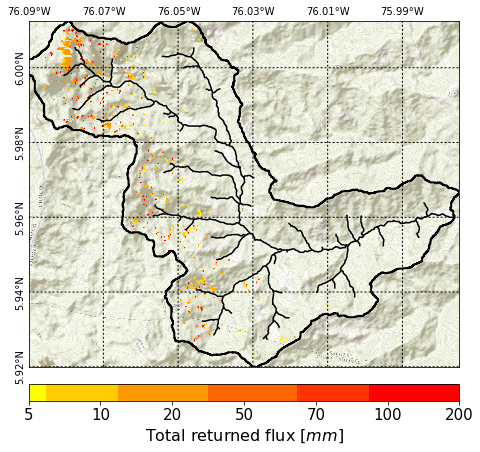

(<mpl_toolkits.basemap.Basemap at 0x7fb56964d250>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb56a99cc50>)

In [67]:
cu.Plot_basin(RetClass,ZeroAsNaN='si', backMap=True, colorTable=pl.get_cmap('autumn_r',6),
    colorbarLabel='Total returned flux [$mm$]',
    ruta = '/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Mapa_FlujoRetorno.png',
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'k', per_color = 'k', shpWidth = 1.5,
    cbar_ticks = np.arange(0,8),
    cbar_ticklabels = [5, 10, 20, 50, 70, 100, 200],
    cbar_ticksize = 15)

### Comparación Flujos 

In [11]:
cu.GetGeo_Cell_Basics()

In [12]:
Area = cu.CellAcum * 12.7**2 / 1e6

In [14]:
pos = np.where(wmf.models.control>0)[1]

In [ ]:
DicGreat = {}
cont = 1
for fi,ff in zip([0,200],[150,320]):
    pos = np.where(wmf.models.control>0)[1]
    DicMax = {'sim':[],'conv':[],'stra':[],'sub':[],'run':[]}
    for sim,flux,sep in zip(Res['Qsim'][1:], Res['Fluxes'][1:], Res['Rain_sep'][1:]):
            DicMax['sim'].append(sim[fi:ff].max())
            for i,j in zip([0,1],['run','sub']):
                DicMax[j].append(flux[i][fi:ff].max())
            for i,j in zip([0,1],['conv','stra']):
                DicMax[j].append(sep[i][fi:ff].max())
    for k in DicMax.keys():
        DicMax[k] = np.array(DicMax[k])
    DicGreat.update({str(cont):DicMax})
    cont+=1

In [30]:
Inicio = RainRec.index.get_loc('2015-05-17-00:00')
Fin = RainRec.index.get_loc('2015-05-18-6:30')
Npasos = Fin - Inicio

In [31]:
Val = RainRec.values
VsumC = np.zeros(cu.ncells)
VsumS = np.zeros(cu.ncells)
ConvS = []
StraS = []
RainAcum = []
RainCon = []
RainStra = []
for i in Val:
    rc = []
    rs = []
    if i>1:
        #Lee y obtiene cantidad de lluvia de cada tipo
        v1,r = wmf.models.read_int_basin(rutaConvBin, i,cu.ncells)
        v2,r = wmf.models.read_int_basin(rutaStraBin, i,cu.ncells)
        v3,r = wmf.models.read_int_basin(rutaBin, i,cu.ncells)
        C = (v1/1000.0) * (v3/1000.0)
        S = (v2/1000.0) * (v3/1000.0)
        #Acumula 
        if C.max()>0:
            Ccum = wmf.cu.basin_acum_var(cu.structure[0],np.zeros((1,cu.ncells))+C, cu.ncells)
            rc=Ccum[0][pos]
        else:    
            rc=np.zeros(len(pos))
        #Acumula 
        if S.max()>0:
            Scum = wmf.cu.basin_acum_var(cu.structure[0],np.zeros((1,cu.ncells))+S, cu.ncells)
            rs=Scum[0][pos]
        else:    
            rs=np.zeros(len(pos))
    else:
        #Intervalo sin lluvia
        C = 0
        S = 0
        rc=np.zeros(len(pos))   
        rs=np.zeros(len(pos))   
    RainCon.append(rc)
    RainStra.append(rs)
    VsumC+=C
    VsumS+=S
    ConvS.append(np.mean(C))
    StraS.append(np.mean(S))
ConvS = np.array(ConvS)
StraS = np.array(StraS)
RainCon = np.array(RainCon) 
RainStra = np.array(RainStra)

In [32]:
ConvS = pd.Series(ConvS, index=RainVal.index)
StraS = pd.Series(StraS, index=RainVal.index)

UnboundLocalError: local variable 'ax' referenced before assignment

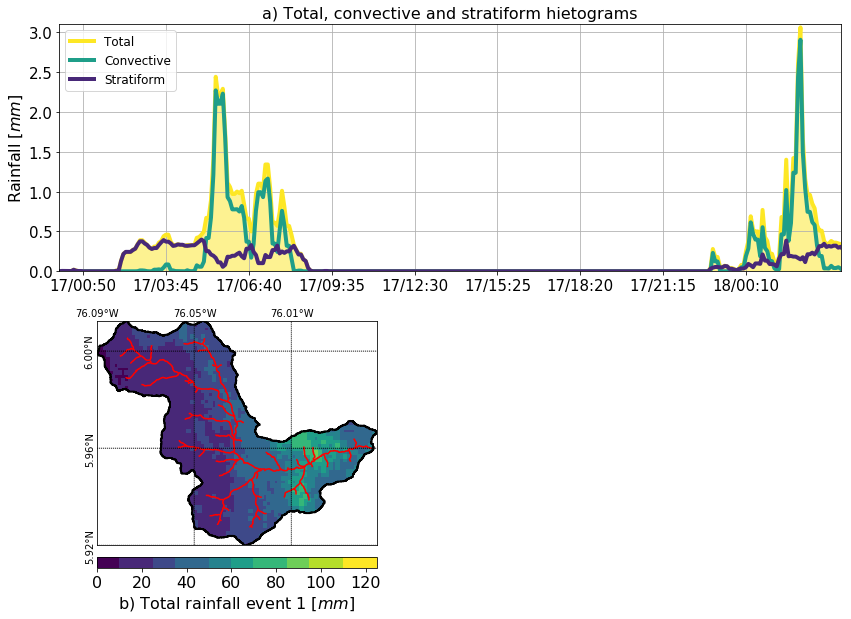

In [33]:
fig = pl.figure(figsize=(14,10))
ax = fig.add_subplot(211)
ax.plot(RainVal.values[Inicio:Fin], Paleta['c1'], lw = 4, label = 'Total')
ax.fill_between(range(Npasos), RainVal.values[Inicio:Fin], color = Paleta['c1'], alpha = 0.5)
ax.plot(ConvS.values[Inicio:Fin], Paleta['c5'], lw = 4, label = 'Convective')
ax.plot(StraS.values[Inicio:Fin], Paleta['c9'], lw = 4, label = 'Stratiform')
Texto = [i.strftime('%d/%H:%M') for i in RainVal[Inicio:Fin].index.to_pydatetime()]
a = ax.set_xticks(np.arange(10, 301, 35))
a = ax.set_xticklabels([Texto[i] for i in range(10,300,35)])
ax.grid()
ax.legend(loc = 0, fontsize = 'large')
ax.tick_params(labelsize = 15)
ax.set_ylabel('Rainfall $[mm]$', size = 16)
#ax.set_xlabel('Time $[min]$', size = 16)
ax.set_title('a) Total, convective and stratiform hietograms', size = 16)
ax.set_ylim(0,3.1)
ax.set_xlim(0,330)

b = np.linspace(0,120,7)
tt = ['%d'%i for i in b]
ax = fig.add_subplot(223)
RainFileds['E1'][0] = 125
cu.Plot_basin(RainFileds['E1'], backMap=False, colorTable=pl.get_cmap('viridis',10),axis=ax,fig = fig,
    lines_spaces=0.04,ZeroAsNaN='si',ticksize = 14,
    colorbarLabel='b) Total rainfall event 1 [$mm$]', vmin = 0, vmax = 120,
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'r', per_color = 'k', shpWidth = 1.5,
    cbar_ticks = b,
    cbar_ticklabels = tt,
    cbar_ticksize = 16)
ax = fig.add_subplot(224)
cu.Plot_basin(RainFileds['E2'], backMap=False, colorTable=pl.get_cmap('viridis',10),axis=ax,fig=fig,
    lines_spaces=0.04,ZeroAsNaN='si',ticksize = 14,
    colorbarLabel='c) Total rainfall event 2 [$mm$]', vmin = 0, vmax = 120,
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'r', per_color = 'k', shpWidth = 1.5,
    cbar_ticks = b,
    cbar_ticklabels = tt,
    cbar_ticksize = 16)

pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Rainfall_separation.png',
    bbox_inches = 'tight')

In [44]:
Inicio = RainRec.index.get_loc('2015-05-17-00:00')
Fin = RainRec.index.get_loc('2015-05-18-6:30')
Npasos = Fin - Inicio
RainRecC = wmf.read_rain_struct(rutaConvHdr)
RainRecS = wmf.read_rain_struct(rutaStraHdr)

In [45]:
Rain = RainRec[' Lluvia'][Inicio:Fin]*12
Conv = RainRecC[' Lluvia'][Inicio:Fin]*12
Stra = RainRecS[' Lluvia'][Inicio:Fin]*12

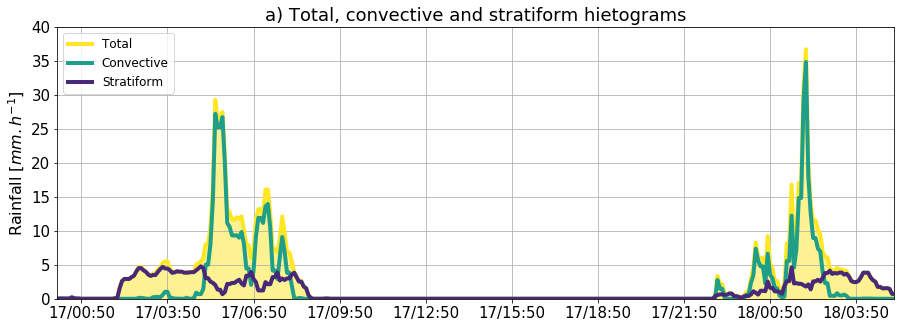

In [99]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(Rain.values, Paleta['c1'], lw = 4, label = 'Total')
ax.fill_between(range(Rain.size), Rain.values, color = Paleta['c1'], alpha = 0.5)
ax.plot(ConvS*12, Paleta['c5'], lw = 4, label = 'Convective')
ax.plot(StraS*12, Paleta['c9'], lw = 4, label = 'Stratiform')
Texto = [i.strftime('%d/%H:%M') for i in Rain.index.to_pydatetime()]
a = ax.set_xticks(np.arange(10, 350, 36))
a = ax.set_xticklabels([Texto[i] for i in range(10,350,36)])
ax.grid()
ax.legend(loc = 0, fontsize = 'large')
ax.tick_params(labelsize = 15)
ax.set_ylabel('Rainfall $[mm.h^{-1}]$', size = 16)
#ax.set_xlabel('Time $[min]$', size = 16)
ax.set_title('a) Total, convective and stratiform hietograms', size = 18)
ax.set_ylim(0,40)
ax.set_xlim(0,350)

pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Rainfall_separation_1.png',
    bbox_inches = 'tight')

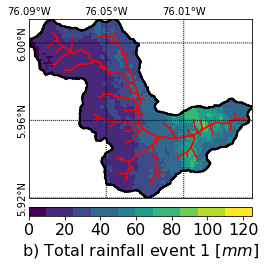

(<mpl_toolkits.basemap.Basemap at 0x7f7cb8e0f190>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7cb917bd10>)

In [97]:
fig = pl.figure(figsize=(4,4))
RainFileds['E1'][0] = 125
cu.Plot_basin(RainFileds['E1'], backMap=False, colorTable=pl.get_cmap('viridis',10),fig = fig,
    lines_spaces=0.04,ZeroAsNaN='si',ticksize = 17,
    colorbarLabel='b) Total rainfall event 1 [$mm$]', vmin = 0, vmax = 120,
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'r', per_color = 'k', shpWidth = 1.5,
    cbar_ticks = b,
    cbar_ticklabels = tt,
    cbar_ticksize = 16,
    ruta = '/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Rainfall_separation_2.png')

In [78]:
ax

In [60]:
Rain.index[::36]

DatetimeIndex(['2015-05-17 00:00:00', '2015-05-17 03:00:00',
               '2015-05-17 06:00:00', '2015-05-17 09:00:00',
               '2015-05-17 12:00:00', '2015-05-17 15:00:00',
               '2015-05-17 18:00:00', '2015-05-17 21:00:00',
               '2015-05-18 00:00:00', '2015-05-18 03:00:00',
               '2015-05-18 06:00:00'],
              dtype='datetime64[ns]', name=u' Fecha ', freq=None)

In [50]:
Val = RainRec.values

In [53]:
Val = RainRec[' Record'][Inicio:Fin].values
VsumC = np.zeros(cu.ncells)
VsumS = np.zeros(cu.ncells)
ConvS = []
StraS = []
RainAcum = []
RainCon = []
RainStra = []
for i in Val:
    rc = []
    rs = []
    if i>1:
        #Lee y obtiene cantidad de lluvia de cada tipo
        v1,r = wmf.models.read_int_basin(rutaConvBin, i,cu.ncells)
        v2,r = wmf.models.read_int_basin(rutaStraBin, i,cu.ncells)
        v3,r = wmf.models.read_int_basin(rutaBin, i,cu.ncells)
        C = (v1/1000.0) * (v3/1000.0)
        S = (v2/1000.0) * (v3/1000.0)
        #Acumula 
        if C.max()>0:
            Ccum = wmf.cu.basin_acum_var(cu.structure[0],np.zeros((1,cu.ncells))+C, cu.ncells)
            rc=Ccum[0][pos]
        else:    
            rc=np.zeros(len(pos))
        #Acumula 
        if S.max()>0:
            Scum = wmf.cu.basin_acum_var(cu.structure[0],np.zeros((1,cu.ncells))+S, cu.ncells)
            rs=Scum[0][pos]
        else:    
            rs=np.zeros(len(pos))
    else:
        #Intervalo sin lluvia
        C = 0
        S = 0
        rc=np.zeros(len(pos))   
        rs=np.zeros(len(pos))   
    RainCon.append(rc)
    RainStra.append(rs)
    VsumC+=C
    VsumS+=S
    ConvS.append(np.mean(C))
    StraS.append(np.mean(S))
ConvS = np.array(ConvS)
StraS = np.array(StraS)
RainCon = np.array(RainCon) 
RainStra = np.array(RainStra)

In [32]:
print 'Porcentaje participacion evento 1'
print ConvS.values[Inicio:Fin][:100].sum()/ RainVal.values[Inicio:Fin][:100].sum()
print StraS.values[Inicio:Fin][:100].sum()/ RainVal.values[Inicio:Fin][:100].sum()

print 'Porcentaje participacion evento 2'
print ConvS.values[Inicio:Fin][200:].sum()/ RainVal.values[Inicio:Fin][200:].sum()
print StraS.values[Inicio:Fin][200:].sum()/ RainVal.values[Inicio:Fin][200:].sum()

Porcentaje participacion evento 1
0.608897511773
0.389932226481
Porcentaje participacion evento 2
0.624057549661
0.374411678649


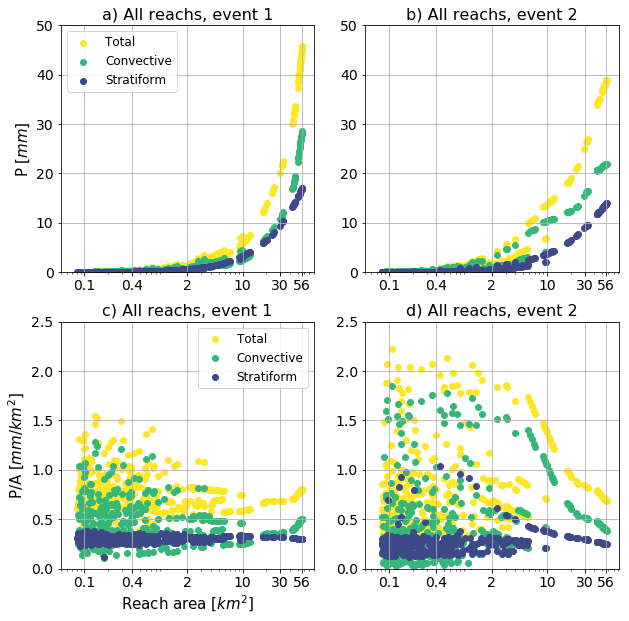

In [27]:


fig = pl.figure(figsize=(10,10))
p2 = np.where(Area[pos]<60)[0]

#Figura 1: Comparacion toda para evento 1
ax = fig.add_subplot(221)
ax.scatter(Area[pos][p2],(RainCon[0:150].sum(axis=0)[p2]+RainStra[0:150].sum(axis=0)[p2])/ float(cu.ncells),
    label ='Total', color = Paleta['c1'])
ax.scatter(Area[pos][p2],RainCon[0:150].sum(axis=0)[p2] / float(cu.ncells), label = 'Convective',
    color = Paleta['c4'])
ax.scatter(Area[pos][p2],RainStra[0:150].sum(axis=0)[p2]/ float(cu.ncells), label = 'Stratiform',
    color = Paleta['c8'])
ax.set_xscale('log')
ax.grid()
ax.set_title('a) All reachs, event 1', size = 16)
#ax.set_ylabel('Rainfall/Reach Area [$mm/km^2$]', size = 15)
ax.set_ylabel('P [$mm$]', size = 15)
ax.tick_params(labelsize = 14)
ax.set_xticklabels([])
ax.set_ylim(0,50)
ax.legend(loc = 0, fontsize = 'large')
a = ax.set_xticks([0.1, 0.4, 2,10,30,56])
a = ax.set_xticklabels([0.1, 0.4, 2,10,30,56])
#ax.set_xlabel('Reach area $[km^2]$', size = 15)
#Figura 1: Comparacion toda para evento 2
ax = fig.add_subplot(222)
ax.scatter(Area[pos][p2],(RainCon[200:].sum(axis=0)[p2]+RainStra[0:150].sum(axis=0)[p2])/ float(cu.ncells),
    label ='Total', color = Paleta['c1'])
ax.scatter(Area[pos][p2],RainCon[200:].sum(axis=0)[p2] / float(cu.ncells), label = 'Convective',
    color = Paleta['c4'])
ax.scatter(Area[pos][p2],RainStra[200:].sum(axis=0)[p2]/ float(cu.ncells), label = 'Stratiform',
    color = Paleta['c8'])
ax.set_xscale('log')
ax.grid()
ax.set_ylim(0,50)
ax.tick_params(labelsize = 14)
ax.set_title('b) All reachs, event 2', size = 16)
a = ax.set_xticks([0.1, 0.4, 2,10,30,56])
a = ax.set_xticklabels([0.1, 0.4, 2,10,30,56])

#Figura 1: Comparacion toda para evento 1
ax = fig.add_subplot(223)
ax.scatter(Area[pos][p2],(RainCon[0:150].sum(axis=0)[p2]+RainStra[0:150].sum(axis=0)[p2])/ float(cu.ncells)/Area[pos][p2],
    label ='Total', color = Paleta['c1'])
ax.scatter(Area[pos][p2],RainCon[0:150].sum(axis=0)[p2] / float(cu.ncells)/Area[pos][p2], label = 'Convective',
    color = Paleta['c4'])
ax.scatter(Area[pos][p2],RainStra[0:150].sum(axis=0)[p2]/ float(cu.ncells)/Area[pos][p2], label = 'Stratiform',
    color = Paleta['c8'])
ax.set_xscale('log')
ax.grid()
ax.set_title('c) All reachs, event 1', size = 16)
#ax.set_ylabel('Rainfall/Reach Area [$mm/km^2$]', size = 15)
ax.set_ylabel('P/A [$mm/km^2$]', size = 15)
ax.tick_params(labelsize = 14)
ax.set_xticklabels([])
ax.set_ylim(0,2.5)
ax.legend(loc = 0, fontsize = 'large')
a = ax.set_xticks([0.1, 0.4, 2,10,30,56])
a = ax.set_xticklabels([0.1, 0.4, 2,10,30,56])
ax.set_xlabel('Reach area $[km^2]$', size = 15)
#Figura 1: Comparacion toda para evento 2
ax = fig.add_subplot(224)
ax.scatter(Area[pos][p2],(RainCon[200:].sum(axis=0)[p2]+RainStra[0:150].sum(axis=0)[p2])/ float(cu.ncells)/Area[pos][p2],
    label ='Total', color = Paleta['c1'])
ax.scatter(Area[pos][p2],RainCon[200:].sum(axis=0)[p2] / float(cu.ncells)/Area[pos][p2], label = 'Convective',
    color = Paleta['c4'])
ax.scatter(Area[pos][p2],RainStra[200:].sum(axis=0)[p2]/ float(cu.ncells)/Area[pos][p2], label = 'Stratiform',
    color = Paleta['c8'])
ax.set_xscale('log')
ax.grid()
ax.set_ylim(0,2.5)
ax.tick_params(labelsize = 14)
ax.set_title('d) All reachs, event 2', size = 16)
a = ax.set_xticks([0.1, 0.4, 2,10,30,56])
a = ax.set_xticklabels([0.1, 0.4, 2,10,30,56])

#Guarda la figura 
pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/RainAcum_by_reach.png')

In [20]:
DicSupCorr = {}
c = 1
for fi,ff in zip([120,345],[160,385]):
    DicCorr = {'ConRun':[], 'StraRun':[], 'ConSub':[],'StraSub':[]}
    for i in np.linspace(0.2,56,15):
        p2 = np.where(Area[pos]<i)[0]
        #Correlaciones con Runoff
        DicCorr['ConRun'].append(sc.stats.pearsonr(RainCon[fi:ff].sum(axis = 0)[p2], DicGreat[str(c)]['run'][p2])[0])
        DicCorr['StraRun'].append(sc.stats.pearsonr(RainStra[fi:ff].sum(axis = 0)[p2], DicGreat[str(c)]['run'][p2])[0])
        #Correlaciones con Subsup
        DicCorr['ConSub'].append(sc.stats.pearsonr(RainCon[fi:ff].sum(axis = 0)[p2], DicGreat[str(c)]['sub'][p2])[0])
        DicCorr['StraSub'].append(sc.stats.pearsonr(RainStra[fi:ff].sum(axis = 0)[p2], DicGreat[str(c)]['sub'][p2])[0])
    DicSupCorr.update({str(c):DicCorr})
    c+=1

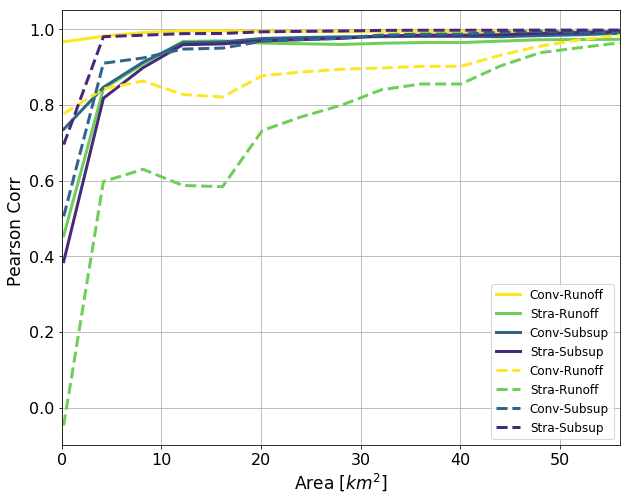

In [21]:
fig = pl.figure(figsize=(10,8))
ax = fig.add_subplot(111)
pl.plot(np.linspace(0.2,56,15),DicSupCorr['2']['ConRun'], Paleta['c1'],lw = 3, label = 'Conv-Runoff')
pl.plot(np.linspace(0.2,56,15),DicSupCorr['2']['StraRun'], Paleta['c3'],lw = 3, label = 'Stra-Runoff')
pl.plot(np.linspace(0.2,56,15),DicSupCorr['2']['ConSub'], Paleta['c7'],lw = 3, label = 'Conv-Subsup')
pl.plot(np.linspace(0.2,56,15),DicSupCorr['2']['StraSub'], Paleta['c9'],lw = 3, label = 'Stra-Subsup')

pl.plot(np.linspace(0.2,56,15),DicSupCorr['1']['ConRun'], Paleta['c1'],lw = 3, ls='--',label = 'Conv-Runoff')
pl.plot(np.linspace(0.2,56,15),DicSupCorr['1']['StraRun'], Paleta['c3'],lw = 3, ls='--',label = 'Stra-Runoff')
pl.plot(np.linspace(0.2,56,15),DicSupCorr['1']['ConSub'], Paleta['c7'],lw = 3, ls='--',label = 'Conv-Subsup')
pl.plot(np.linspace(0.2,56,15),DicSupCorr['1']['StraSub'], Paleta['c9'],lw = 3, ls='--',label = 'Stra-Subsup')

pl.grid()
#ax.set_xscale('log')
#pl.xlim(0,30)
ax.tick_params(labelsize = 16)
ax.legend(loc = 0, fontsize = 'large')
ax.set_xlabel('Area $[km^2]$', size = 17)
ax.set_ylabel('Pearson Corr ', size = 17)
ax.set_xlim(0,56)

pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/CorrPearson_TipoRain_Fluxes.png',
    bbox_inches = 'tight')

### Relación de lluvia acumulada de cada tipo con el orden de horton 

In [22]:
cu.GetGeo_Horton()

In [23]:
CantHorton = []
for j in range(1,6):
    p1 = np.where(cu.CellHorton_Hill == j)[0]
    CantHorton.append(p1.size)
CantHorton = np.array(CantHorton, dtype=float) / cu.ncells

In [24]:
Val = RainRec.values
VsumC = np.zeros(cu.ncells)
VsumS = np.zeros(cu.ncells)
ConvHort = []
StraHort = []
for i in Val:
    cv = []
    sv = []
    if i>1:
        #Lee y obtiene cantidad de lluvia de cada tipo
        v1,r = wmf.models.read_int_basin(rutaConvBin, i,cu.ncells)
        v2,r = wmf.models.read_int_basin(rutaStraBin, i,cu.ncells)
        v3,r = wmf.models.read_int_basin(rutaBin, i,cu.ncells)
        C = (v1/1000.0) * (v3/1000.0)
        S = (v2/1000.0) * (v3/1000.0)
        for j in range(1,6):
            p1 = np.where(cu.CellHorton_Hill == j)[0]
            cv.append(C[p1].sum()/cu.ncells)
            sv.append(S[p1].sum()/cu.ncells)
    else:
        for j in range(1,6):
            cv.append(0)
            sv.append(0)
    #Agrega a la matriz de lluvia por orden 
    ConvHort.append(cv)
    StraHort.append(sv)
#vuelve array
ConvHort = np.array(ConvHort)
StraHort = np.array(StraHort)

In [25]:
Texto = [i.strftime('%d-%H:%M') for i in RainRec.index.to_pydatetime()]

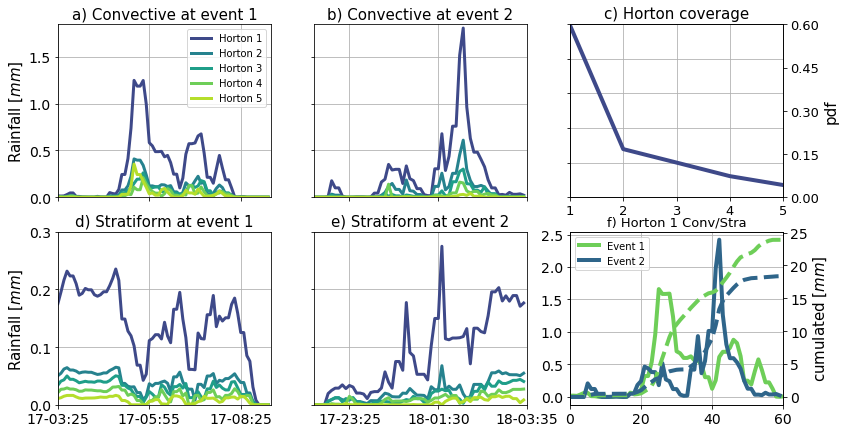

In [26]:
fig = pl.figure(figsize=(13,7))

ax = fig.add_subplot(231)
for i,c in zip(range(5), ['c8','c6','c5','c3','c2']):
    pl.plot(ConvHort.T[i,100:170], Paleta[c],lw = 3,label = 'Horton '+str(i+1))
ax.set_title('a) Convective at event 1', size = 15)
ax.set_xlim(0,70)
ax.set_ylim(0,1.85)
ax.grid()
ax.set_xticks(np.linspace(0,60, 3))
ax.set_xticklabels([])
ax.tick_params(labelsize = 14)
ax.set_ylabel('Rainfall [$mm$]', size = 15)
ax.legend(loc = 0)

ax = fig.add_subplot(232)
for i,c in zip(range(5), ['c8','c6','c5','c3','c2']):
    pl.plot(ConvHort.T[i,330:390], Paleta[c], lw = 3)
ax.set_title('b) Convective at event 2', size = 15)
ax.set_xlim(0,60)
ax.set_ylim(0,1.85)
ax.set_xticks(np.linspace(10,60, 3))
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid()
ax.tick_params(labelsize = 14)

ax = fig.add_subplot(234)
for i,c in zip(range(5), ['c8','c6','c5','c3','c2']):
    pl.plot(StraHort.T[i,100:170], Paleta[c], lw = 3)
ax.set_title('d) Stratiform at event 1', size = 15)
ax.set_xlim(0,70)
ax.set_ylim(0,0.3)
ax.set_yticks([0, 0.1,0.2,0.3])
ax.set_xticks(np.linspace(0,60, 3))
t = [Texto[100+int(i)] for i in np.linspace(0,60, 3)]
ax.set_xticklabels(t)
ax.grid()
ax.tick_params(labelsize = 14)
ax.set_ylabel('Rainfall [$mm$]', size = 15)

ax = fig.add_subplot(235)
for i,c in zip(range(5), ['c8','c6','c5','c3','c2']):
    pl.plot(StraHort.T[i,330:390], Paleta[c], lw = 3)
ax.set_title('e) Stratiform at event 2', size = 15)
ax.set_xlim(0,60)
ax.set_ylim(0,0.3)
ax.set_yticks([0, 0.1,0.2,0.3])
ax.set_yticklabels([])
ax.set_xticks(np.linspace(10,60, 3))
t = [Texto[330+int(i)] for i in np.linspace(10,60, 3)]
ax.set_xticklabels(t)
ax.grid()
ax.tick_params(labelsize = 14)

ax = fig.add_subplot(233)
ax.set_title('c) Horton coverage', size = 15)
ax2 = ax.twinx()
ax2.plot(range(1,6), CantHorton, Paleta['c8'],lw = 4)
ax2.set_xlim(1,5)
ax2.set_ylim(0,0.6)
ax2.set_yticks([0, 0.15, 0.3,0.45,0.6])
ax2.set_ylabel('pdf', size = 15)
ax.grid()
ax2.tick_params(labelsize = 13)
ax.tick_params(labelsize = 13)
ax.set_yticklabels([])

ax = fig.add_subplot(236)
ax.set_title('f) Horton 1 Conv/Stra', size = 13)
ax.plot(ConvHort.T[0:2,100:170].sum(axis = 0) , Paleta['c3'], lw = 4, label = 'Event 1')
ax.plot(ConvHort.T[0:2,330:390].sum(axis = 0) , Paleta['c7'], lw = 4, label = 'Event 2')
ax.set_xlim(0,60)
ax2 = ax.twinx()
ax2.plot(np.cumsum(ConvHort.T[0:2,100:170].sum(axis = 0)) , Paleta['c3'], lw = 4, ls = '--')
ax2.plot(np.cumsum(ConvHort.T[0:2,330:390].sum(axis = 0)) , Paleta['c7'], lw = 4, ls = '--')
ax2.set_xlim(0,60)
#ax.set_ylim(0,30)
ax.grid()
ax.tick_params(labelsize = 14)
ax2.tick_params(labelsize = 14)
ax2.set_ylabel('cumulated [$mm$]', size = 15)
ax.legend(loc = 0)

pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Horton_vs_ConvStrat.png', bbox_inches = 'tight')

In [46]:
AllRain = wmf.read_mean_rain('/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/Ensayo_12m.hdr')

NameError: name 'Qsim' is not defined

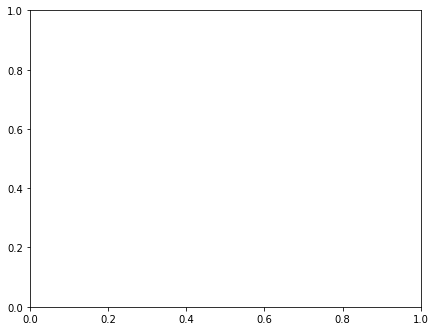

In [9]:
fig = pl.figure(figsize=(7,12)) 

ax = fig.add_subplot(211)
q = np.copy(Qsim['1'].values[20:120])
qr = np.copy(Qsep['1']['run'].values[20:120])
qs = np.copy(Qsep['1']['sub'].values[20:120])
r = np.copy(RainVal.values[20+Inicio:120+Inicio])
rc = np.copy(ConvHort.T[:,20+Inicio:120+Inicio].sum(axis = 0))
rs = np.copy(StraHort.T[:,20+Inicio:120+Inicio].sum(axis = 0))

Dp1 = []
Dp2 = []
Dp3 = []
rcc = rc.cumsum()/rc.sum()
qrc = qr.cumsum()/qr.sum()
qrs = qs.cumsum()/qs.sum()
qss = q.cumsum()/q.sum()
for i in range(rcc.size):
    p1 = np.where(qrc == find_nearest(qrc, rcc[i]))[0]
    p2 = np.where(qrs == find_nearest(qrs, rcc[i]))[0]
    p3 = np.where(qss == find_nearest(qss, rcc[i]))[0]
    Dp1.append(p1 - i)
    Dp2.append(p2 - i)
    Dp3.append(p3 - i)
Dp1 = np.array(Dp1)
Dp2 = np.array(Dp2)
Dp3 = np.array(Dp3)

ax.plot(np.cumsum(q) / q.sum(), Paleta['c4'], lw = 4.5, label = 'Streamflow')
ax.plot(np.cumsum(qr) / qr.sum(), Paleta['c2'], lw = 3, label = 'Runoff')
ax.plot(np.cumsum(qs) / qs.sum(), Paleta['c2'], lw = 3,ls = '--', label = 'Subsuperficial')
ax.plot(np.cumsum(r) / r.sum(), Paleta['c8'], lw = 4.5, label = 'Rainfall')
ax.plot(np.cumsum(rc) / rc.sum(), Paleta['c9'], lw = 3, label = 'Convective')
ax.plot(np.cumsum(rs) / rs.sum(), Paleta['c9'], lw = 3, ls = '--',label = 'Stratiform')
ax.grid()

num = np.median(Dp3[20:50])*5 / 60.
tex = '$Et_{p50}=%.2f$ h' % num
ax.text(2,0.98, tex,fontsize = 14)

ax.hlines(0.95, 1,25)

num = np.median(Dp1[20:50])*5 / 60.
tex = '$Etc_{p50}=%.2f$ h' % num
ax.text(2,0.9, tex,fontsize = 14)
num = np.min(Dp1[20:50])*5 / 60.
tex = '$Etc_{min}=%.2f$ h' % num
ax.text(2,0.82, tex,fontsize = 14)

ax.hlines(0.8, 1,25)

num = np.median(Dp2[30:50])*5 / 60.
tex = '$Ets_{p50}=%.2f$ h' % num
ax.text(2,0.7, tex,fontsize = 14)
num = np.min(Dp2[30:50])*5 / 60.
tex = '$Ets_{min}=%.2f$ h' % num
ax.text(2,0.62, tex,fontsize = 14)


ax.fill_betweenx([0,1.05],20,50, color = 'gray', alpha = 0.25)
ax.set_xlim(0,80)
ax.set_ylim(0,1.05)
ax.tick_params(labelsize = 15)
ax.legend(loc = 0, fontsize = 'x-large')
ax.set_ylabel('Accumulation [$\%$]', size = 16)
ax.set_title('a) Event 1 (17/05/2015)', size = 18)
ax.set_xticklabels([])

ax = fig.add_subplot(212)
q = np.copy(Qsim['1'].values[250:330])
qr = np.copy(Qsep['1']['run'].values[250:330])
qs = np.copy(Qsep['1']['sub'].values[250:330])
r = np.copy(RainVal.values[250+Inicio:330+Inicio])
rc = np.copy(ConvHort.T[:,250+Inicio:330+Inicio].sum(axis = 0))
rs = np.copy(StraHort.T[:,250+Inicio:330+Inicio].sum(axis = 0))

Dp1 = []
Dp2 = []
Dp3 = []
rcc = rc.cumsum()/rc.sum()
qrc = qr.cumsum()/qr.sum()
qrs = qs.cumsum()/qs.sum()
qss = q.cumsum()/q.sum()
for i in range(rcc.size):
    p1 = np.where(qrc == find_nearest(qrc, rcc[i]))[0]
    p2 = np.where(qrs == find_nearest(qrs, rcc[i]))[0]
    p3 = np.where(qss == find_nearest(qss, rcc[i]))[0]
    Dp1.append(p1 - i)
    Dp2.append(p2 - i)
    Dp3.append(p3 - i)
Dp1 = np.array(Dp1)
Dp2 = np.array(Dp2)
Dp3 = np.array(Dp3)

ax.plot(np.cumsum(q) / q.sum(), Paleta['c4'], lw = 4.5)
ax.plot(np.cumsum(qr) / qr.sum(), Paleta['c2'], lw = 3)
ax.plot(np.cumsum(qs) / qs.sum(), Paleta['c2'], lw = 3,ls = '--', label = 'Runoff')
ax.plot(np.cumsum(r) / r.sum(), Paleta['c8'], lw = 4.5)
ax.plot(np.cumsum(rc) / rc.sum(), Paleta['c9'], lw = 3)
ax.plot(np.cumsum(rs) / rs.sum(), Paleta['c9'], lw = 3, ls = '--')

num = np.median(Dp3[20:50])*5 / 60.
tex = '$Et_{p50}=%.2f$ h' % num
ax.text(2,0.98, tex,fontsize = 14)

ax.hlines(0.95, 1,25)

num = np.median(Dp1[20:50])*5 / 60.
tex = '$Etc_{p50}=%.2f$ h' % num
ax.text(2,0.9, tex,fontsize = 14)
num = np.min(Dp1[20:50])*5 / 60.
tex = '$Etc_{min}=%.2f$ h' % num
ax.text(2,0.82, tex,fontsize = 14)

ax.hlines(0.8, 1,25)

num = np.median(Dp2[30:50])*5 / 60.
tex = '$Ets_{p50}=%.2f$ h' % num
ax.text(2,0.7, tex,fontsize = 14)
num = np.min(Dp2[30:50])*5 / 60.
tex = '$Ets_{min}=%.2f$ h' % num
ax.text(2,0.62, tex,fontsize = 14)

ax.fill_betweenx([0,1.05],20,50, color = 'gray', alpha = 0.25)
ax.grid()
ax.set_xlim(0,80)
ax.set_ylim(0,1.05)
ax.tick_params(labelsize = 15)
ax.set_ylabel('Accumulation [$\%$]', size = 16)
ax.set_title('b) Event 2 (18/05/2015)', size = 18)
ax.set_xlabel('Time [$hours$]', size = 16)
n = [i*5/60. for i in range(0, 81, 12)]
ti = ['%.2f'%i for i in n]
ax.set_xticks(range(0, 81, 12))
ax.set_xticklabels(ti)

#pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Rain_Streamflow_Elapsed.png', bbox_inches = 'tight')

In [211]:
q = np.copy(Qsim['1'].values[20:120])
qr = np.copy(Qsep['1']['run'].values[20:120])
qs = np.copy(Qsep['1']['sub'].values[20:120])
r = np.copy(RainVal.values[20+Inicio:120+Inicio])
rc = np.copy(ConvHort.T[:,20+Inicio:120+Inicio].sum(axis = 0))
rs = np.copy(StraHort.T[:,20+Inicio:120+Inicio].sum(axis = 0))

In [212]:
qs = qs.cumsum() / qs.sum()

In [213]:
qr = qr.cumsum() / qr.sum()

In [214]:
rc = rc.cumsum() / rc.sum()

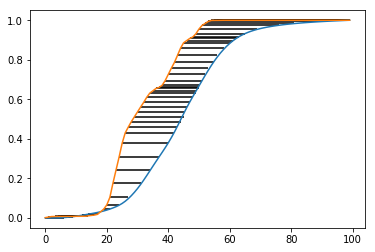

In [215]:
pl.plot(qs)
pl.plot(rc)

Dp = []
for i in range(rc.size):
    p = np.where(qs == find_nearest(qs, rc[i]))[0]
    Dp.append(p - i)
    pl.hlines(rc[i],i,p,'k')

In [122]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [188]:
Dp = []
for i in range(rc.size):
    p = np.where(qr == find_nearest(qr, rc[i]))[0]
    Dp.append(p - i)

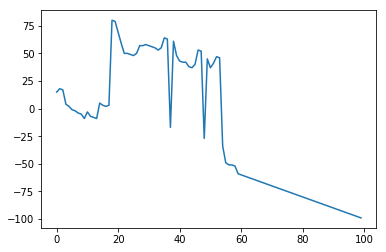

In [186]:
pl.plot(Dp)

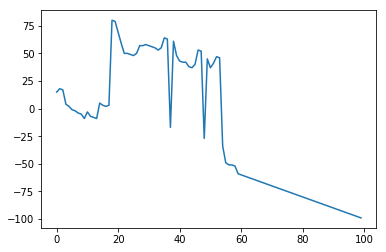

In [189]:
pl.plot(Dp)

In [184]:
np.min(Dp[20:50])

5

___
# Deslizamientos

- Preparar deslizamientos.
- Simulación de la ocurrencia de deslizamientos en la cuenca 

Prepara las variables requeridas para la modelacion de deslizamientos 

In [31]:
cu.GetGeo_HAND()
cu.GetGeo_Cell_Basics()
rutSto = '/media/nicolas/Home/nicolas/03_SALGAR/bin_sto/Salgar_Storage.bin.StObin'

In [7]:
def Clasificador_byHAND(Values):
    Classified = np.zeros(cu.ncells)
    for i,j in zip(range(1,5), Values):
        pos = np.where(cu.CellHAND_class == i)[0]
        Classified[pos] = j
    return Classified

In [8]:
Fric = Clasificador_byHAND([35,30,25,22])
Gamma = Clasificador_byHAND([19,19,18,15])
Coe = Clasificador_byHAND([3.5,3.7,3.9,3.9])

In [11]:
Fprof = 3.5
#Valores contantes debido a que no hay mapas 
cu.set_Slides(Fric,'FrictionAngle')
cu.set_Slides(Gamma,'GammaSoil')
cu.set_Slides(Coe,'Cohesion')
cu.set_Slides(cu.CellSlope,'Slope')
cu.set_Slides(0.5,'FS')
# Profundidad del suelo 
Z = np.zeros(cu.ncells)
Z[cu.CellSlope<0.25]=0.6
Z[(cu.CellSlope>=0.25)&(cu.CellSlope<0.30)]=1.0
Z[(cu.CellSlope>=0.30)&(cu.CellSlope<0.50)]=0.3
Z[cu.CellSlope>=0.5] = 0.2
#coloca ese parametro 
cu.set_Slides(Z*Fprof,'Zs')

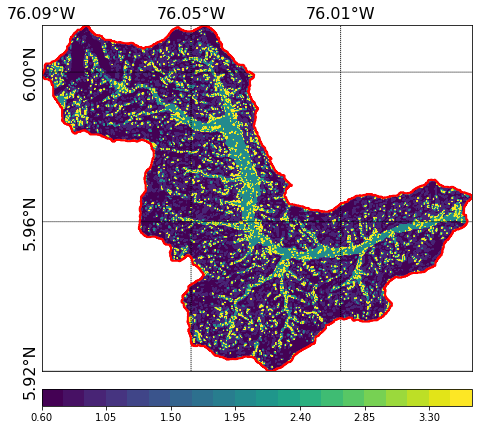

In [153]:
cu.Plot_basin(Z*Fprof, lines_spaces=0.04)

In [154]:
P = Z*Fprof

In [156]:
Z.mean()

0.28934503886083845

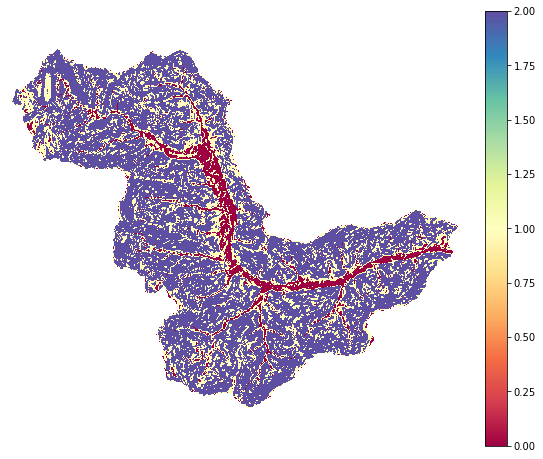

In [12]:
wmf.models.slide_allocate(cu.ncells, 10)
c = cu.Plot_basinClean(wmf.models.sl_riskvector, show_cbar=True)

Set de la ejecucion del modelo para que no guarde y simule deslizamientos 

In [13]:
wmf.models.save_storage = 0
wmf.models.sim_slides = 1
wmf.models.sl_gullienogullie = 0
wmf.models.sl_fs = 0.3

Toma condiciones 

In [23]:
#Punto de inicio y punto fin 
Inicio = RainRec.index.get_loc('2015-05-17-22:25')
Fin = RainRec.index.get_loc('2015-05-18-4:15')
Npasos = Fin - Inicio

In [33]:
cu.set_Storage(rutSto,230)
#cu.set_Storage(rutSto,100)

In [34]:
#Ejecucion del modelo
Res,Qsim,Qq = cu.run_shia(Calibracion,
    rutaBin,
    Npasos,Inicio,
    ruta_conv = rutaConvBin,
    ruta_stra = rutaStraBin)

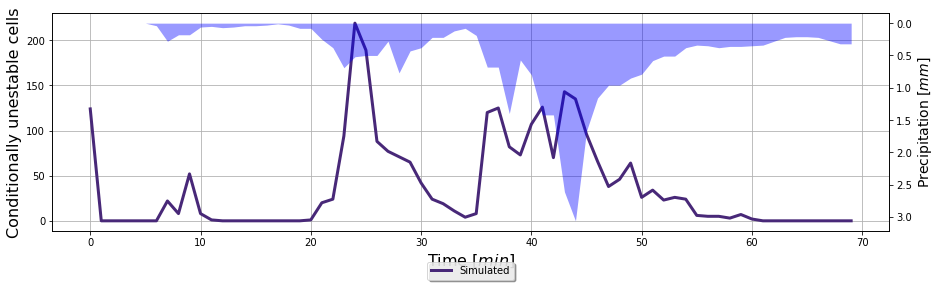

In [35]:
Texto = [i.strftime('%d/%H:%M') for i in RainVal[Inicio:Fin].index.to_pydatetime()]
ax1,ax2 = wmf.plot_sim_single(Res['Slides_NCell_Serie'], ids = 'N pixels', Qs_lw = 3, 
    Qs_color = Paleta['c9'],
    mrain = RainVal.values[Inicio:Fin],
    ylabel = 'Conditionally unestable cells',
    figsize = (15,4), 
    show = False)
# ax2.set_ylim(3,0)
# #ax1.set_xlim(5,80)
# #ax2.set_xlim(5,80)
# a = ax1.set_xticks(np.arange(5, 81, 10))
# a = ax1.set_xticklabels([Texto[i] for i in range(5, 81, 10)])
# ax1.legend(loc = 0, fontsize = 'large')
# ax1.tick_params(labelsize = 14)
# ax2.tick_params(labelsize = 14)
#pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Slides_Serie.png', bbox_inches = 'tight')

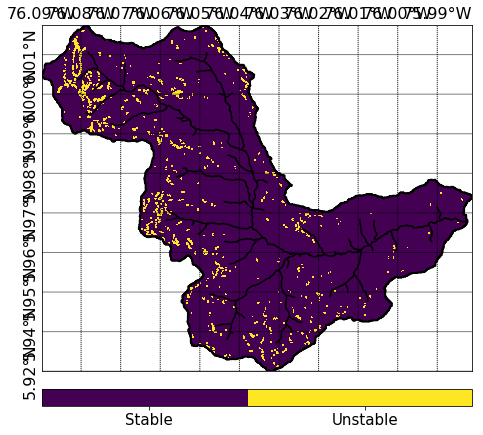

In [36]:
cu.Plot_basin(Res['Slides_Acum'], backMap=True, colorTable=pl.get_cmap('viridis',2),
    #ruta = '/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Mapa_Deslizamientos.png',
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'k', per_color = 'k', shpWidth = 1.5,
    #cbar_ticks = np.arange(1,50,5)+0.5,
    #cbar_ticklabels = np.arange(1,50,5),
    cbar_ticks = [0.25,0.75],
    cbar_ticklabels = ['Stable','Unstable'],
    cbar_ticksize = 15)

In [38]:
Desliz, prop = wmf.read_map_raster('/media/nicolas/Home/nicolas/03_SALGAR/raster/observed_desliz_grande.tif')
Desliz = cu.Transform_Map2Basin(Desliz,prop)
Desliz[Desliz<>1] = 0

In [39]:
print Res['Slides_Acum'].sum()
print Desliz.sum()

2623
2779.0


In [40]:
Diferencia = Desliz*2 + Res['Slides_Acum']
print Diferencia[Diferencia == 0].size 
print Diferencia[Diferencia == 3].size 
print Diferencia[Diferencia == 1].size 
print Diferencia[Diferencia == 2].size 

347262
124
2499
2655


In [41]:
100*float(126) / cu.ncells

0.035740625177284845

In [66]:
SlidesSim = np.zeros(cu.ncells)
SlidesObs = np.zeros(cu.ncells)
for i in range(1,cu.nhills+1):
    pos = np.where(cu.hills_own == i)[0]
    CountSim = np.count_nonzero(Res['Slides_Acum'][0][pos])    
    CountObs = np.count_nonzero(Desliz[pos])    
    SlidesSim[pos] = CountSim
    SlidesObs[pos] = CountObs
SlidesSim[0] = SlidesObs.max()

In [73]:
Difslides = SlidesObs - SlidesSim

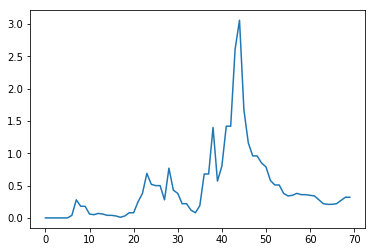

In [98]:
pl.plot(RainVal.values[Inicio:Fin])

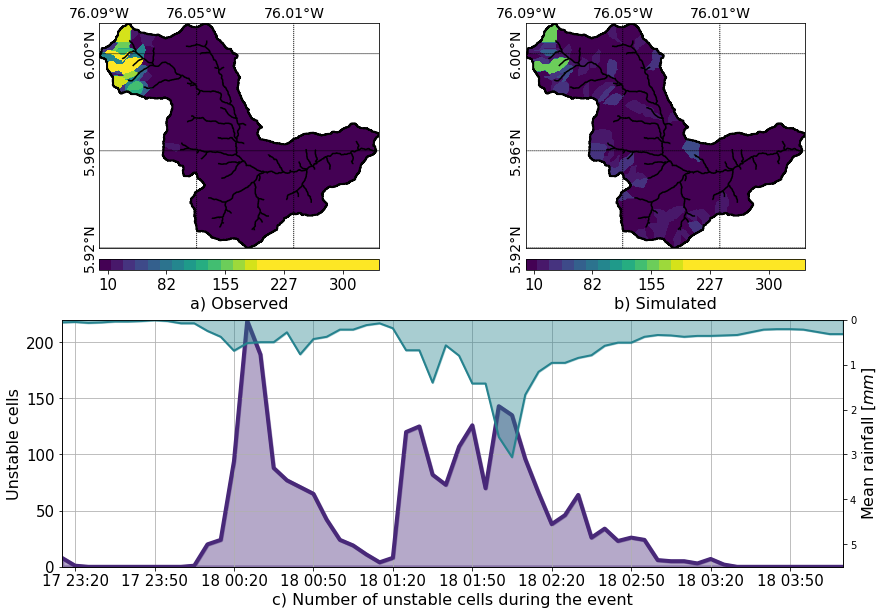

In [118]:
ran = np.linspace(10,300,5)
tt = ['%d'%i for i in ran]
fig = pl.figure(figsize=(14,10))
ax = fig.add_subplot(221)
cu.Plot_basin(SlidesObs, ticksize = 14, fig = fig, axis=ax, lines_spaces=0.04, 
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'k', per_color = 'k', shpWidth = 1.5,
    vmin = 10, vmax = 200,
    cbar_ticks = ran,
    colorbarLabel = 'a) Observed',
    cbar_ticklabels = tt,
    cbar_ticksize = 15)
#ax.set_title('a) Observed')
ax = fig.add_subplot(222)
cu.Plot_basin(SlidesSim, ticksize = 14, fig = fig, axis=ax, lines_spaces=0.04, 
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'k', per_color = 'k', shpWidth = 1.5,
    vmin = 10, vmax = 200,
    colorbarLabel = 'b) Simulated',
    cbar_ticks = ran,
    cbar_ticklabels = tt,
    cbar_ticksize = 15)

ax = fig.add_subplot(212)
Dates = RainVal[Inicio:Fin].index.to_pydatetime()
Data = Res['Slides_NCell_Serie']
ax.plot(Dates[10:], Data[10:],c = Paleta['c9'], lw = 4)
ax.fill_between(Dates[10:], Data[10:],color = Paleta['c9'], lw = 4, alpha = 0.4)
ax.set_xlim(Dates[10],Dates[-1])
ax.set_ylim(0,220)
ax.grid()
ax.tick_params(labelsize = 15)
ax.set_xlabel('c) Number of unstable cells during the event', size = 16)
ax.set_ylabel('Unstable cells', size = 16)
ax2 = ax.twinx()
ylim = ax2.get_ylim() [::-1]
ax2.set_ylim(ylim)
Rain = RainVal.values[Inicio:Fin][10:]
ax2.plot(Dates[10:],Rain, c = Paleta['c6'], lw = 2)
ax2.fill_between(Dates[10:],Rain, color = Paleta['c6'], lw = 2, alpha = 0.4)
ax2.set_ylabel('Mean rainfall [$mm$]',size = 16)
ax2.set_ylim(5.5,0)
ax2.set_xlim(Dates[10],Dates[-1])
pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Slides_byHills.png',
    bbox_inches = 'tight')



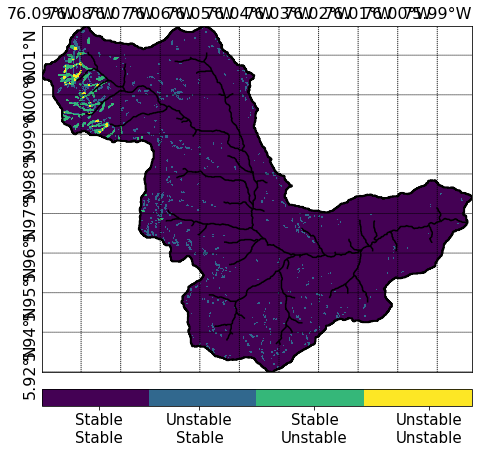

In [43]:
cu.Plot_basin(Diferencia, backMap=True, colorTable=pl.get_cmap('viridis',4),
    ruta = '/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Mapa_Desliz_Valid.png',
    rutaShp = '/media/nicolas/Home/nicolas/03_SALGAR/vector/red12m',
    shpColor = 'k', per_color = 'k', shpWidth = 1.5,
    #cbar_ticks = np.arange(1,50,5)+0.5,
    #cbar_ticklabels = np.arange(1,50,5),
    cbar_ticks = [0.4,1.1,1.9,2.7],
    cbar_ticklabels = ['Stable\nStable','Unstable\nStable', 'Stable\nUnstable','Unstable\nUnstable'],
    cbar_ticksize = 15)

**Algunas conclusiones**:

- EL modelo de deslizamientos no agarra en la perfección a los observados, puede ser debido a:
    - Falta en la distribución espacial de las variables del suelo.
    - Fallas en el DEM.
    - Errores en la estimación de la lluvia y posiblemente localización a escala de ladera.
- El modelo simula alrededor de 2623 celdas deslizadas, se observan aproximadamente 2779.
- Pueden existir errores importantes en el levantamiento de los deslizamientos observados, estos se han obtenido a partir de información seundaria, no se miran los deslizamientos menores cubiertos por vegetación.
- El modelo no transporta el deslizamiento aguas abajo, fenómeno que se aprecia en los observados.

## Simulación de Inundaciones 

In [261]:
%matplotlib inline
import pylab as pl 
import numpy as np 
from wmf import wmf
import pandas as pd
import scipy as sc

In [262]:
#Rutas de lluvia 
rutaBin = '/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/Ensayo_12m.bin'
rutaHdr = '/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/Ensayo_12m.hdr'
#Estructura temporal de la lluvia 
RainStruct = wmf.read_rain_struct(rutaHdr)
RainRec = RainStruct[' Record']
RainVal = RainStruct[' Lluvia']

In [263]:
Calibracion = [0.01, 2.7, 0.8, 0.0, 0.1, 1.0, 0.5, 0.996, 1.0, 1.0]
cu = wmf.SimuBasin(rute='/media/nicolas/Home/nicolas/03_SALGAR/nc_cuencas/cuencaSalgar_4_12mts.nc')

In [265]:
cu.GetGeo_Cell_Basics()

In [266]:
slope_temp = np.copy(wmf.models.flood_slope)
Slope_tramo = np.zeros(cu.ncells)
Ancho_tramo = np.zeros(cu.ncells)
for i in range(1,375):
    pos = np.where((cu.hills_own == i) & (cu.CellCauce == 1))[0]
    Slope_tramo[pos] = slope_temp[0][pos].mean()
    Ancho_tramo[pos] = W[pos].mean()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice.


In [379]:
cu.set_Floods(1000, 'GammaWater')
cu.set_Floods(2600, 'GammaSoil')
cu.set_Floods(1/10., 'VelArea')
cu.set_Floods(0.75, 'Cmax')
#cu.set_Floods(0.2, 'Cmax')

#Ancho
cu.GetQ_Balance(2000)
W = 3.26 * cu.CellQmed ** 0.469
#cu.Plot_basin(W, colorTable=pl.get_cmap('viridis'), colorbarLabel=u'Ancho de la sección Estimado $[mts]$')
cu.set_Floods(Ancho_tramo, 'Stream_W')
#Pendiente
cu.set_Floods(Slope_tramo,'Slope')
#D50 
cu.set_Floods(0.138, 'Stream_D50')
#Tamano de celda
wmf.models.dxp = 12.7
wmf.models.flood_hmax = 10.

In [380]:
wmf.models.flood_slope = np.ones((1,cu.ncells))*Slope_tramo

In [269]:
cu.set_Floods(0,'Sections', NumCeldas=12)

In [456]:
wmf.models.sim_floods = 1
wmf.models.flood_umbral = 3.
wmf.models.flood_max_iter = 6
wmf.models.flood_step = 0.1
wmf.models.separate_fluxes = 0
wmf.models.separate_rain = 0
wmf.models.show_speed = 1
wmf.models.show_mean_speed = 1

In [10]:
#Punto de inicio y punto fin 
Inicio = RainRec.index.get_loc('2015-05-17-22:00')
Fin = RainRec.index.get_loc('2015-05-18-6:00')
Npasos = Fin - Inicio

In [457]:
rutSto = '/media/nicolas/Juesnei/Nicolas/03_Salgar/bin_sto/Salgar_Storage.bin.StObin'
cu.set_Storage(rutSto,230)

In [458]:
#Ejecucion del modelo
Res,Qsim = cu.run_shia(Calibracion,
    rutaBin,
    55,Inicio,
    kinematicN=6)

In [ ]:
#Ejecucion paso a paso 
for itera in range(96):
    #Ejecuta
    Res,Qsim = cu.run_shia(Calibracion,
        rutaBin,
        1,
        Inicio+itera,
        kinematicN=6)
    #Mapa de profundidades
    MapProf = np.zeros(cu.ncells)
    pos = np.where(cu.CellCauce == 1)[0]
    for i in pos:
        for sec_cell,prof_cell in zip(wmf.models.flood_sec_cells.T[i], wmf.models.flood_profundidad.T[i]):
            if sec_cell>0:
                if cu.CellHAND_class[int(sec_cell-1)] < 4:
                    MapProf[int(sec_cell-1)] = prof_cell    
    MapProf[MapProf<0] = 0
    #Guarda el mapa 
    m = cu.Transform_Basin2Map(MapProf, '/home/nicolas/Dropbox/Articulos_Prep/Salgar/Manchas/Mapa_'+str(itera)+'.tif')
    print itera
    #Actualiza condiciones
    for c,k in enumerate(Res['Storage']):
        cu.set_Storage(k,c)

In [385]:
cu.GetGeo_HAND()

In [459]:
MapProf = np.zeros(cu.ncells)
pos = np.where(cu.CellCauce == 1)[0]
for i in pos:
    for sec_cell,prof_cell in zip(wmf.models.flood_sec_cells.T[i], wmf.models.flood_profundidad.T[i]):
        if sec_cell>0:
            if cu.CellHAND_class[int(sec_cell-1)] < 4:
                MapProf[int(sec_cell-1)] = prof_cell    
MapProf[MapProf<0] = 0

In [460]:
flood = np.copy(wmf.models.flood_flood)

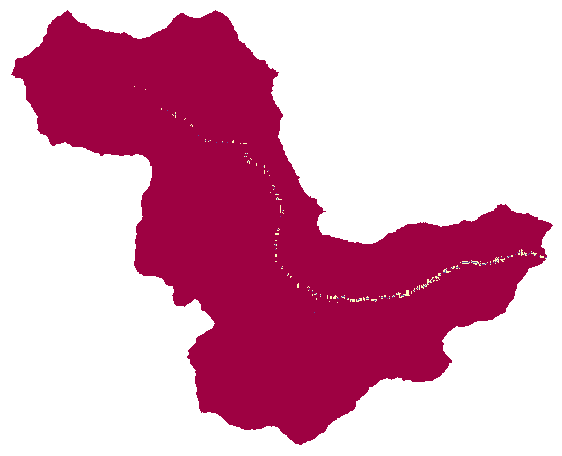

([-76.09495544433594,
  -75.979600286285859,
  5.924575328826904,
  6.017220999347046],
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9d8d2cb390>)

In [461]:
flood[(flood<>1) & (flood<>2)] = 0
cu.Plot_basinClean(flood, ZeroAsNaN='si',colorbar=False, colorTable=pl.get_cmap('viridis_r') ,) #backMap=True)

In [462]:
m = cu.Transform_Basin2Map(MapProf, '/home/nicolas/Dropbox/Temporal/Inundacion2.tif')

In [81]:
m = cu.Transform_Basin2Map(cu.CellHAND_class, '/home/nicolas/Dropbox/Temporal/HAND_class.tif')

## Ejercicio muy experimental de encañonamiento por orden de Horton

In [85]:
cu.GetGeo_Horton()

In [115]:
wmf.models.flood_sections.shape

(25, 352540)

In [116]:
pos = np.where(cu.CellCauce == 1)[0]
PerHorton = {}
for j in range(1,6):
    p1 = np.where(cu.CellHorton_Stream[pos] == j)[0]
    Sec = wmf.models.flood_sections[:,pos[p1]] - wmf.models.flood_sections[13,pos[p1]]
    Per = []
    for i in [10,25,50,75,90]:
        Per.append(np.percentile(Sec, i, axis=1))
    PerHorton.update({str(j):np.array(Per)})
    

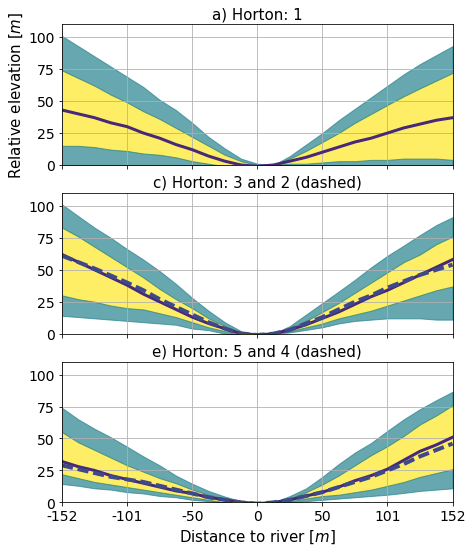

In [133]:
fig = pl.figure(figsize=(7,15))
letras = ['a','b','c','d','e']
for c,J in enumerate(range(1,6,2)):
    ax = fig.add_subplot(5,1,c+1)
    pl.plot(PerHorton[str(J)][2], Paleta['c9'],lw = 3)
    if J>1:
        pl.plot(PerHorton[str(J-1)][2],Paleta['c8'],ls='--', lw = 4)
    pl.fill_between(range(25),PerHorton[str(J)][1],PerHorton[str(J)][3], color = Paleta['c1'],alpha = 0.7)
    pl.fill_between(range(25),PerHorton[str(J)][0],PerHorton[str(J)][1], color = Paleta['c6'],alpha = 0.7)
    pl.fill_between(range(25),PerHorton[str(J)][3],PerHorton[str(J)][4], color = Paleta['c6'],alpha = 0.7)
    ax.set_xlim(0,24)
    ax.grid()
    ax.set_ylim(0,110)
    ax.tick_params(labelsize = 14)
    if J>1:
        ax.set_title(letras[J-1] +') Horton: '+str(J)+' and '+str(J-1)+' (dashed)', size = 15)
    else:
        ax.set_title(letras[J-1] +') Horton: '+str(J), size = 15)
    if J<5:
        a = ax.set_xticks(np.arange(0,26,4))
        ax.set_xticklabels([])
    if J == 1:
        ax.set_ylabel('Relative elevation $[m]$', size = 15)
a = ax.set_xticks(np.arange(0,26,4))
Texto = ['%d'%i for i in (np.arange(0,26,4)-12)*12.7]
a = ax.set_xticklabels(Texto)
ax.set_xlabel('Distance to river $[m]$', size = 15)
pl.savefig('/home/nicolas/Dropbox/Articulos_Prep/Salgar/FigurasNuevas/Sections_Histogram.png',
    bbox_inches = 'tight')

## Pendientes por orden de horton 

In [281]:
cu.GetGeo_Horton()

In [257]:
PendStream = []
PendHill = []
for i in range(1,6):
    pos1 = np.where(cu.CellHorton_Stream == i)[0]
    pos2 = np.where(cu.CellHorton_Hill == i)[0]
    PendStream.append(cu.CellSlope[pos1].mean())
    PendHill.append(cu.CellSlope[pos2].mean())

In [259]:
PendStream

[0.37084118, 0.27799398, 0.13348262, 0.097061649, 0.064366601]

In [260]:
PendHill

[0.60749197, 0.57614917, 0.49872735, 0.43215218, 0.42069164]

## Celdas Inundadas por horton 

In [298]:
CeldasInundadas = []
for i in range(1,6):
    pos1 = np.where(cu.CellHorton_Hill == i)[0]
    pos2 = np.where(MapProf[pos1]>0)[0]
    CeldasInundadas.append(pos2.size)
CeldasInundadas = np.array(CeldasInundadas, dtype=float)
CeldasInundadas = CeldasInundadas / CeldasInundadas.sum()

In [299]:
CeldasInundadas

array([ 0.07037275,  0.04273779,  0.18026992,  0.38142674,  0.3251928 ])

## Algoritmo de inundación por vecindad 

copia el mapa de inundaciones

In [466]:
MapProf = np.copy(m[0])
MapProf2 = np.copy(m[0])

Limpia puntos solos

In [467]:
Umbral = 2
pos = np.where(MapProf>0)
for i,j in zip(pos[0], pos[1]):
    #Mira cuantos vecinos tiene cada punto 
    Cant = np.count_nonzero(MapProf[i-1:i+2,j-1:j+2])
    if Cant < Umbral: MapProf2[i,j] = 0

In [468]:
wmf.Save_Array2Raster(MapProf2, m[1], '/home/nicolas/Desktop/Ensayo_limpia.tif')

Proceso de llenado por la corriente 

In [469]:
RelDEM = cu.Transform_Basin2Map(cu.CellHeight)[0]
pos = np.where(MapProf2>0)

In [426]:
MapProf3 = np.copy(MapProf2)
for i,j in zip(pos[0], pos[1]):
    ElevTemp = RelDEM[i,j] + MapProf2[i,j]
    for ki in range(-1,2):
        for kj in range(-1,2):
            #if ki<>0 and kj<>0:
            if RelDEM[i+ki, j+kj]<ElevTemp:
                MapProf3[i+ki, j+kj] = ElevTemp - RelDEM[i+ki, j+kj]

In [470]:
iterTimes = 1
for i in range(iterTimes):
    #encuentra las pos
    pos = np.where(MapProf2>0)
    MapProf3 = np.copy(MapProf2)
    #Itera
    for i,j in zip(pos[0], pos[1]):
        ElevTemp = RelDEM[i,j] + MapProf2[i,j]
        for ki in range(-1,2):
            for kj in range(-1,2):
                #if ki<>0 and kj<>0:
                if RelDEM[i+ki, j+kj]<ElevTemp:
                    MapProf3[i+ki, j+kj] = ElevTemp - RelDEM[i+ki, j+kj]
    #Remplaza mapas 
    MapProf2 = np.copy(MapProf3)

In [471]:
wmf.Save_Array2Raster(MapProf3, m[1], '/home/nicolas/Desktop/Ensayo.tif')

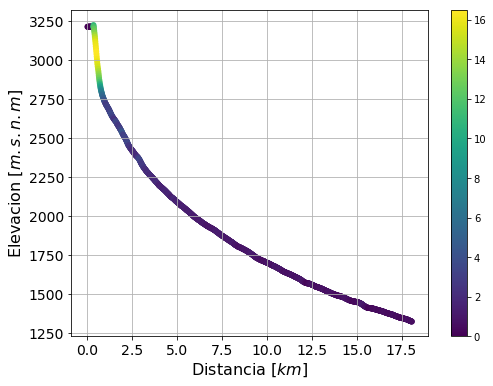

In [415]:
cu.PlotPpalStream(ruta='/home/nicolas/Dropbox/Hidrologia-UdeM/Parcial1/Perfil.png')

In [ ]:
cu.GetQ_Max()

# Rainfall validation

In [80]:
Rain = wmf.read_rain_struct('/media/nicolas/Home/nicolas/03_SALGAR/bin_rain/Salgar12m_2015_300seg.hdr')

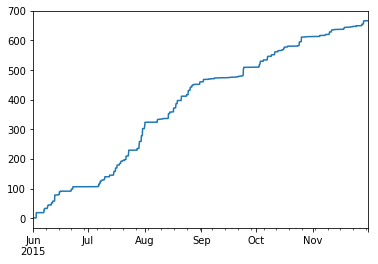

In [79]:
Rain['2015-06':'2015-11'].cumsum().plot()

In [94]:
p1 = Rain.index.get_loc('2015-06-01 00:00')
p2 = Rain.index.get_loc('2015-11-01 00:00')

In [105]:
Pp = []
for pos in Rain[' Record'][p1:p2]:
    if pos > 1:
        v,r  = wmf.models.read_int_basin(rutaBin, pos, cu.ncells)
        pre = wmf.cu.basin_extract_var_by_point(cu.structure, v, xy.T, 3, 2, cu.ncells)
        Pp.append(pre.tolist())
    else:
        Pp.append([0,0])

In [107]:
Pp = np.array(Pp)

In [108]:
Pp = pd.DataFrame(Pp, Rain[' Record'][p1:p2].index)

In [ ]:
138-Liboriana -76.0315 5.95706
136-Hospital  -75.9803 5.96486

In [84]:
xy = np.array([[-76.0315, 5.95706], [-75.9803, 5.96486]])

In [86]:
v,r  = wmf.models.read_int_basin(rutaBin, 2, cu.ncells)

In [99]:
a = wmf.cu.basin_extract_var_by_point(cu.structure, v, xy.T, 3, 2, cu.ncells)

In [101]:
a.tolist()

[0.0, 252.0]

In [29]:
Qo = pd.read_csv('136_2015-05-23_2016-05-23.csv')

In [55]:
Dates = []
Data = []
for i,j,k in zip(Qo['fecha'].values, Qo['hora'].values, Qo['136']):
    try:
        Dates.append(pd.Timestamp(i + ' '+ j.split(' ')[-1].split('.')[0]))
        Data.append(k)
    except:
        pass


In [142]:
Qobs.to_msgpack('NivelSalgar.msg')

In [57]:
Qobs = pd.Series(Data, index=Dates)

In [58]:
Qobs[Qobs<0] = np.nan

In [59]:
Qobs = Qobs.resample('5min').mean()

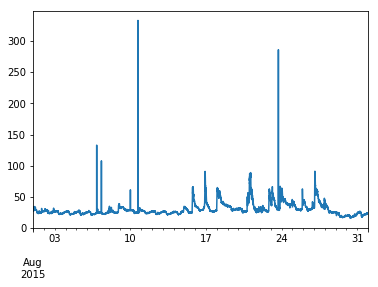

In [67]:
Qobs['2015-08'].plot()

In [24]:
qobs = Qo['136'].values
qobs[qobs < 0] = np.nan
qobs[qobs > 400] = np.nan

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


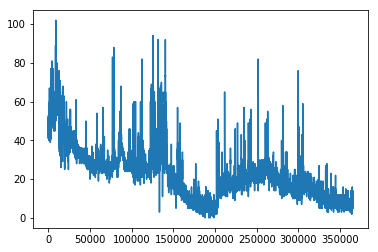

In [28]:
pl.plot(qobs)